<a href="https://colab.research.google.com/github/WBruni/analise-churn-telecom-x/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "Churn de Clientes" na Telecom X

O "Churn de Clientes" da Telecom X, tem como objetivo principal entender os fatores que contribuem para o alto índice de cancelamentos de clientes (churn). O objetivo aqui é coletar, tratar e analisar os dados usando o Python e suas bibliotecas.

Os insights gerados a partir desta análise serão cruciais para que a equipe de Data Science possa desenvolver modelos preditivos e estratégias eficazes para reduzir a evasão de clientes.
___

# 🔍 **Análise da Estrutura dos Dados**
Os dados são organizados em um formato hierárquico (dicionário dentro de dicionário), contendo as seguintes informações:

1. **Identificação do Cliente**  
   - `'customerID'`: Identificador único do cliente.  
   - `'Churn'`: Indica se o cliente cancelou o serviço (`Yes` ou `No`).  

2. **Informações do Cliente** (`'customer'`)  
   - `'gender'`: Gênero do cliente (`Male` ou `Female`).  
   - `'SeniorCitizen'`: Indica se o cliente é idoso (0 = Não, 1 = Sim).  
   - `'Partner'`: Se o cliente tem um parceiro(a).  
   - `'Dependents'`: Se o cliente tem dependentes.  
   - `'tenure'`: Tempo de permanência como cliente (em meses).  

3. **Serviços de Telefonia** (`'phone'`)  
   - `'PhoneService'`: Indica se o cliente possui serviço de telefone (`Yes` ou `No`).  
   - `'MultipleLines'`: Se possui múltiplas linhas telefônicas.  

4. **Serviços de Internet** (`'internet'`)  
   - Tipo de serviço de internet contratado (`DSL`, `Fiber optic`, `No`).  
   - Serviços adicionais (`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`).  

5. **Informações da Conta** (`'account'`)  
   - `'Contract'`: Tipo de contrato (`Month-to-month`, `One year`, `Two year`).  
   - `'PaperlessBilling'`: Se o cliente recebe faturas eletrônicas.  
   - `'PaymentMethod'`: Método de pagamento (`Bank transfer`, `Credit card`, `Electronic check`, `Mailed check`).  
   - `'Charges'`:  
     - `'Monthly'`: Valor mensal cobrado.  
     - `'Total'`: Valor total pago pelo cliente.  



#📌 Extracão

In [ ]:
import requests
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/WBruni/analise-churn-telecom-x/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
df = pd.json_normalize(data)
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformação

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

## 🔍 Verificação

### 1. Valores Únicos

In [ ]:
for col in df.columns:
  print(f'{col}: {df[col].unique()}')
  if df[col].nunique() < 50:
    print(df[col].unique())
    print('-' * 50)

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
['No' 'Yes' '']
--------------------------------------------------
customer.gender: ['Female' 'Male']
['Female' 'Male']
--------------------------------------------------
customer.SeniorCitizen: [0 1]
[0 1]
--------------------------------------------------
customer.Partner: ['Yes' 'No']
['Yes' 'No']
--------------------------------------------------
customer.Dependents: ['Yes' 'No']
['Yes' 'No']
--------------------------------------------------
customer.tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
phone.PhoneService: ['Yes' 'No']
['Yes' 'No']
--------------------------------------------------
phone.MultipleLines: ['No' 'Yes' 'No phone service']
['No' 'Yes' 'No phone service']
------

### 2. Valores Duplicados

In [ ]:
print('Número de Valores Duplicados', df.duplicated().sum())

Número de Valores Duplicados 0


### 3. Valores Nulos

In [ ]:
print('Número de Valores Nulos \n', df.isnull().sum())

Número de Valores Nulos 
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


### 4. Valores Vazios ou em Branco

In [ ]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


### 5. Lidando com Valores Vazios

In [ ]:
df = df[df['Churn'].astype(str).str.strip() != '']
df = df[df['account.Charges.Total'].astype(str).str.strip() != '']

print(f'Número de linhas após remoção de valores vazios: {len(df)}')

# Verifique novamente os valores vazios para confirmar
print('\nVerificação de valores vazios/em branco após a remoção:')
display(df.apply(lambda x: x.astype(str).str.strip() == '').sum().to_frame(name='Qtd Valores Vazios'))

Número de linhas após remoção de valores vazios: 7032

Verificação de valores vazios/em branco após a remoção:


,Qtd Valores Vazios
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


### 6. Conversão de `account.Charges.Total` para `float`

In [ ]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'])


print('Tipo de dado da coluna account.Charges.Total após conversão:')
df.info()

Tipo de dado da coluna account.Charges.Total após conversão:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   objec

##🔧 Transformação

### 1. Binarização de Múltiplas Colunas no `df`

In [ ]:
# Mapeamento comum para colunas 'Yes'/'No'
binary_mapping = {
    'No': 0,
    'Yes': 1
}

# Lista de colunas a serem binarizadas, incluindo 'Churn'
columns_to_binarize = [
    'Churn',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'account.PaperlessBilling'
]

for col in columns_to_binarize:
    if col in df.columns:
        df[col] = df[col].map(binary_mapping)
        print(f"Coluna '{col}' binarizada. Valores únicos: {df[col].unique()}")
    else:
        print(f"Coluna '{col}' não encontrada no DataFrame.")


print("\nVerificando os tipos de dados após a binarização combinada:")
df.info()

Coluna 'Churn' binarizada. Valores únicos: [0 1]
Coluna 'customer.Partner' binarizada. Valores únicos: [1 0]
Coluna 'customer.Dependents' binarizada. Valores únicos: [1 0]
Coluna 'phone.PhoneService' binarizada. Valores únicos: [1 0]
Coluna 'account.PaperlessBilling' binarizada. Valores únicos: [1 0]

Verificando os tipos de dados após a binarização combinada:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   int64  
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   int64  
 5   customer.Dependents        7032 non-null   int64  
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService        

### 2. Binarização da Coluna `customer.gender` no `df`

In [ ]:
# Mapeamento para binarizar a coluna 'customer.gender'
# Vamos atribuir 0 para 'Female' e 1 para 'Male'
binary_gender_mapping = {
    'Female': 0,
    'Male': 1
}

# Aplica o mapeamento à coluna 'customer.gender' no df
df['customer.gender'] = df['customer.gender'].map(binary_gender_mapping)

print("Coluna 'customer.gender' após a binarização:")
display(df[['customer.gender']].head())

print("Verificando os tipos de dados após a binarização:")
df.info()

Coluna 'customer.gender' após a binarização:


,customer.gender
0,0
1,1
2,1
3,1
4,0


Verificando os tipos de dados após a binarização:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   int64  
 2   customer.gender            7032 non-null   int64  
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   int64  
 5   customer.Dependents        7032 non-null   int64  
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   int64  
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  int

### 3. One-Hot Encoding das Colunas Categóricas no `df`

In [ ]:
# Lista de colunas para aplicar One-Hot Encoding
columns_to_onehot = [
    'phone.MultipleLines',
    'internet.InternetService',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.Contract',
    'account.PaymentMethod'
]

# Aplica One-Hot Encoding e concatena com o DataFrame original
# Usamos drop_first=True para evitar a multicolinearidade (cria N-1 colunas para N categorias)
df = pd.get_dummies(df, columns=columns_to_onehot, drop_first=True)

print("DataFrame após One-Hot Encoding. Verifique as novas colunas:")
display(df.head())

print("\nVerificando os tipos de dados após o One-Hot Encoding:")
df.info()

DataFrame após One-Hot Encoding. Verifique as novas colunas:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,...,internet.TechSupport_Yes,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0002-ORFBO,0,0,0,1,1,9,1,1,65.6,...,True,False,True,False,False,True,False,False,False,True
1,0003-MKNFE,0,1,0,0,0,9,1,0,59.9,...,False,False,False,False,True,False,False,False,False,True
2,0004-TLHLJ,1,1,0,0,0,4,1,1,73.9,...,False,False,False,False,False,False,False,False,True,False
3,0011-IGKFF,1,1,1,1,0,13,1,1,98.0,...,False,False,True,False,True,False,False,False,True,False
4,0013-EXCHZ,1,0,1,1,0,3,1,1,83.9,...,True,False,True,False,False,False,False,False,False,True



Verificando os tipos de dados após o One-Hot Encoding:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customerID                                     7032 non-null   object 
 1   Churn                                          7032 non-null   int64  
 2   customer.gender                                7032 non-null   int64  
 3   customer.SeniorCitizen                         7032 non-null   int64  
 4   customer.Partner                               7032 non-null   int64  
 5   customer.Dependents                            7032 non-null   int64  
 6   customer.tenure                                7032 non-null   int64  
 7   phone.PhoneService                             7032 non-null   int64  
 8   account.PaperlessBilling                       7032 non-null   int64  
 9   a

### 4. Criando Cópia do `df`

In [ ]:
df_ml = df.copy()

### 5. Tradução dos Nomes das Colunas

In [ ]:
# Dicionário para traduzir os nomes das colunas com as novas sugestões
col_translation_dict = {
    'customerID': 'id_cliente',
    'Churn': 'churn',
    'customer.gender': 'genero_cliente',
    'customer.SeniorCitizen': 'cliente_senior',
    'customer.Partner': 'tem_parceiro',
    'customer.Dependents': 'tem_dependentes',
    'customer.tenure': 'meses_servico',
    'phone.PhoneService': 'servico_telefone',
    'phone.MultipleLines_No phone service': 'multilinhas_sem_servico_tel',
    'phone.MultipleLines_Yes': 'multilinhas_sim',
    'internet.InternetService_Fiber optic': 'internet_fibra_optica',
    'internet.InternetService_No': 'internet_sem_servico',
    'internet.OnlineSecurity_No internet service': 'seg_online_sem_internet',
    'internet.OnlineSecurity_Yes': 'seg_online_sim',
    'internet.OnlineBackup_No internet service': 'backup_online_sem_internet',
    'internet.OnlineBackup_Yes': 'backup_online_sim',
    'internet.DeviceProtection_No internet service': 'protecao_disp_sem_internet',
    'internet.DeviceProtection_Yes': 'protecao_disp_sim',
    'internet.TechSupport_No internet service': 'suporte_tec_sem_internet',
    'internet.TechSupport_Yes': 'suporte_tec_sim',
    'internet.StreamingTV_No internet service': 'tv_stream_sem_internet',
    'internet.StreamingTV_Yes': 'tv_stream_sim',
    'internet.StreamingMovies_No internet service': 'filmes_stream_sem_internet',
    'internet.StreamingMovies_Yes': 'filmes_stream_sim',
    'account.Contract_One year': 'contrato_um_ano',
    'account.Contract_Two year': 'contrato_dois_anos',
    'account.PaperlessBilling': 'fatura_digital',
    'account.PaymentMethod_Credit card (automatic)': 'pag_cartao_cred_auto',
    'account.PaymentMethod_Electronic check': 'pag_cheque_eletronico',
    'account.PaymentMethod_Mailed check': 'pag_cheque_correio',
    'account.Charges.Monthly': 'cobranca_mensal',
    'account.Charges.Total': 'cobranca_total'
}

# Renomeia as colunas do DataFrame
df_ml = df_ml.rename(columns=col_translation_dict)

print("Nomes das colunas traduzidos no df_ml. Verifique com df_ml.info():")
df_ml.info()

Nomes das colunas traduzidos no df_ml. Verifique com df_ml.info():
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_cliente                   7032 non-null   object 
 1   churn                        7032 non-null   int64  
 2   genero_cliente               7032 non-null   int64  
 3   cliente_senior               7032 non-null   int64  
 4   tem_parceiro                 7032 non-null   int64  
 5   tem_dependentes              7032 non-null   int64  
 6   meses_servico                7032 non-null   int64  
 7   servico_telefone             7032 non-null   int64  
 8   fatura_digital               7032 non-null   int64  
 9   cobranca_mensal              7032 non-null   float64
 10  cobranca_total               7032 non-null   float64
 11  multilinhas_sem_servico_tel  7032 non-null   bool   
 12  multilinhas_si

### 6. Criando Cópia `df_ml` (Cópia para Análise)

In [ ]:
# Cria uma cópia do DataFrame 'df_ml' para ser usado na análise e visualização com valores revertidos
df_analise = df_ml.copy()

print("df_analise criado como cópia de df_ml.")

df_analise criado como cópia de df_ml.


### 7. Revertendo Valores Binários para Texto (no `df_analise`)

In [ ]:
# Mapeamento para reverter 0/1 para texto traduzido
reverse_binary_mapping = {
    0: 'Não',
    1: 'Sim'
}

reverse_gender_mapping = {
    0: 'Feminino',
    1: 'Masculino'
}

# Lista de colunas binarizadas para reverter
columns_to_revert = [
    'churn',
    'tem_parceiro',
    'tem_dependentes',
    'servico_telefone',
    'fatura_digital'
]

for col in columns_to_revert:
    if col in df_analise.columns:
        df_analise[col] = df_analise[col].map(reverse_binary_mapping)
        print(f"Coluna '{col}' revertida. Valores únicos: {df_analise[col].unique()}")

# Revertendo a coluna de gênero
df_analise['genero_cliente'] = df_analise['genero_cliente'].map(reverse_gender_mapping)
print(f"Coluna 'genero_cliente' revertida. Valores únicos: {df_analise['genero_cliente'].unique()}")


# Para as colunas de One-Hot Encoding (que são várias), vamos criar um mapeamento mais complexo ou uma lógica específica
# Isso é mais trabalhoso, pois cada conjunto de OHE representa uma coluna original.
# Por exemplo, para 'internet_fibra_optica', 'internet_sem_servico', a ausência de 1 nas duas implica 'DSL'.
# Para simplicidade de visualização, você pode focar em converter apenas as colunas binarizadas 'padrão' e o gênero.

print("\nValores de algumas colunas após a reversão:")
display(df_analise[['churn', 'genero_cliente', 'tem_parceiro', 'fatura_digital']].head())

print("\nVerificando os tipos de dados após a reversão (algumas colunas voltarão a ser object):")
df_analise.info()

Coluna 'churn' revertida. Valores únicos: ['Não' 'Sim']
Coluna 'tem_parceiro' revertida. Valores únicos: ['Sim' 'Não']
Coluna 'tem_dependentes' revertida. Valores únicos: ['Sim' 'Não']
Coluna 'servico_telefone' revertida. Valores únicos: ['Sim' 'Não']
Coluna 'fatura_digital' revertida. Valores únicos: ['Sim' 'Não']
Coluna 'genero_cliente' revertida. Valores únicos: ['Feminino' 'Masculino']

Valores de algumas colunas após a reversão:


,churn,genero_cliente,tem_parceiro,fatura_digital
0,Não,Feminino,Sim,Sim
1,Não,Masculino,Não,Não
2,Sim,Masculino,Não,Sim
3,Sim,Masculino,Sim,Sim
4,Sim,Feminino,Sim,Sim



Verificando os tipos de dados após a reversão (algumas colunas voltarão a ser object):
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_cliente                   7032 non-null   object 
 1   churn                        7032 non-null   object 
 2   genero_cliente               7032 non-null   object 
 3   cliente_senior               7032 non-null   int64  
 4   tem_parceiro                 7032 non-null   object 
 5   tem_dependentes              7032 non-null   object 
 6   meses_servico                7032 non-null   int64  
 7   servico_telefone             7032 non-null   object 
 8   fatura_digital               7032 non-null   object 
 9   cobranca_mensal              7032 non-null   float64
 10  cobranca_total               7032 non-null   float64
 11  multilinhas_sem_servico_tel  7032 non-null   bool  

### 8. Criação da Coluna `Contas_Diarias` no `df_ml` e `df_analise`

In [ ]:
# Calcula 'Contas_Diarias' para df_ml (para ML)
# Dividimos a cobrança mensal por aproximadamente 30.44 dias (média de dias no mês)
df_ml['contas_diarias'] = df_ml['cobranca_mensal'] / 30.44

# Calcula 'Contas_Diarias' para df_analise (para análise e visualização)
df_analise['contas_diarias'] = df_analise['cobranca_mensal'] / 30.44

print("Coluna 'contas_diarias' adicionada a df_ml:")
display(df_ml[['cobranca_mensal', 'contas_diarias']].head())

print("\nColuna 'contas_diarias' adicionada a df_analise:")
display(df_analise[['cobranca_mensal', 'contas_diarias']].head())

print("\nVerificando os tipos de dados nos DataFrames atualizados:")
df_ml.info()
df_analise.info()

Coluna 'contas_diarias' adicionada a df_ml:


,cobranca_mensal,contas_diarias
0,65.6,2.155059
1,59.9,1.967806
2,73.9,2.427727
3,98.0,3.219448
4,83.9,2.756242



Coluna 'contas_diarias' adicionada a df_analise:


,cobranca_mensal,contas_diarias
0,65.6,2.155059
1,59.9,1.967806
2,73.9,2.427727
3,98.0,3.219448
4,83.9,2.756242



Verificando os tipos de dados nos DataFrames atualizados:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_cliente                   7032 non-null   object 
 1   churn                        7032 non-null   int64  
 2   genero_cliente               7032 non-null   int64  
 3   cliente_senior               7032 non-null   int64  
 4   tem_parceiro                 7032 non-null   int64  
 5   tem_dependentes              7032 non-null   int64  
 6   meses_servico                7032 non-null   int64  
 7   servico_telefone             7032 non-null   int64  
 8   fatura_digital               7032 non-null   int64  
 9   cobranca_mensal              7032 non-null   float64
 10  cobranca_total               7032 non-null   float64
 11  multilinhas_sem_servico_tel  7032 non-null   bool   
 12  multilinhas_sim       

#📊 Carga e análise

## Análise Descritiva

### 1. Médias de Colunas Numéricas e Binárias

In [ ]:
# @title
print("Médias das colunas numéricas (contínuas) no df_ml:")
for col in df_ml.columns:
    # Verifica se a coluna é numérica e não é booleana (considerando float e int)
    if pd.api.types.is_numeric_dtype(df_ml[col]) and not pd.api.types.is_bool_dtype(df_ml[col]):
        if col != 'id_cliente':
            print(f"  {col}: {df_ml[col].mean():.2f}")

print("\nMédias (proporções) das colunas binárias no df_ml:")
for col in df_ml.columns:
    # Verifica se a coluna é booleana ou se é numérica e contém apenas 0s e 1s (que representam binários)
    # Também incluímos colunas int64 que sabemos serem binárias (0 ou 1) que não são bool
    if pd.api.types.is_bool_dtype(df_ml[col]) or (pd.api.types.is_integer_dtype(df_ml[col]) and df_ml[col].isin([0, 1]).all()):
        if col != 'id_cliente':
            print(f"  {col}: {df_ml[col].mean():.2f}")

Médias das colunas numéricas (contínuas) no df_ml:
  churn: 0.27
  genero_cliente: 0.50
  cliente_senior: 0.16
  tem_parceiro: 0.48
  tem_dependentes: 0.30
  meses_servico: 32.42
  servico_telefone: 0.90
  fatura_digital: 0.59
  cobranca_mensal: 64.80
  cobranca_total: 2283.30
  contas_diarias: 2.13

Médias (proporções) das colunas binárias no df_ml:
  churn: 0.27
  genero_cliente: 0.50
  cliente_senior: 0.16
  tem_parceiro: 0.48
  tem_dependentes: 0.30
  servico_telefone: 0.90
  fatura_digital: 0.59
  multilinhas_sem_servico_tel: 0.10
  multilinhas_sim: 0.42
  internet_fibra_optica: 0.44
  internet_sem_servico: 0.22
  seg_online_sem_internet: 0.22
  seg_online_sim: 0.29
  backup_online_sem_internet: 0.22
  backup_online_sim: 0.34
  protecao_disp_sem_internet: 0.22
  protecao_disp_sim: 0.34
  suporte_tec_sem_internet: 0.22
  suporte_tec_sim: 0.29
  tv_stream_sem_internet: 0.22
  tv_stream_sim: 0.38
  filmes_stream_sem_internet: 0.22
  filmes_stream_sim: 0.39
  contrato_um_ano: 0.21
  c

### 2. Análise Descritiva com `.describe()`


In [ ]:
display(df_ml.describe())

,churn,genero_cliente,cliente_senior,tem_parceiro,tem_dependentes,meses_servico,servico_telefone,fatura_digital,cobranca_mensal,cobranca_total,contas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,2.128719
std,0.441782,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,0.988370
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.599540
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,1.169103
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.311104
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,2.952119
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.901117


## Distribuição da Evasão

### Distribuição de Churn Geral

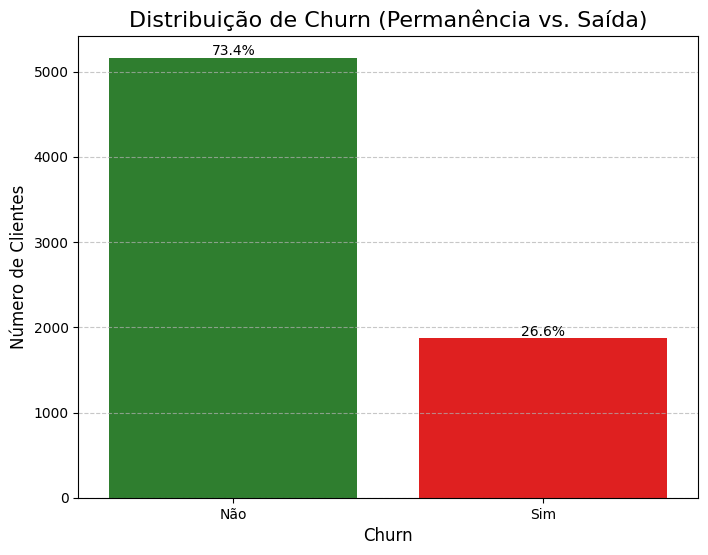

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns


cores_churn = ['#228B22', '#FF0000'] # Verde para 'Não Churn', Vermelho para 'Churn'

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='churn', data=df_analise, palette=cores_churn, hue='churn', legend=False)

plt.title('Distribuição de Churn (Permanência vs. Saída)', fontsize=16)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adicionando o grid aqui


plt.yticks(range(0, 5200, 1000)) # Exemplo: ticks a cada 1000

# Adicionar porcentagens acima das barras
total = len(df_analise['churn'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

### Distribuição de Churn Categóricas

#### 1. Gênero Cliente

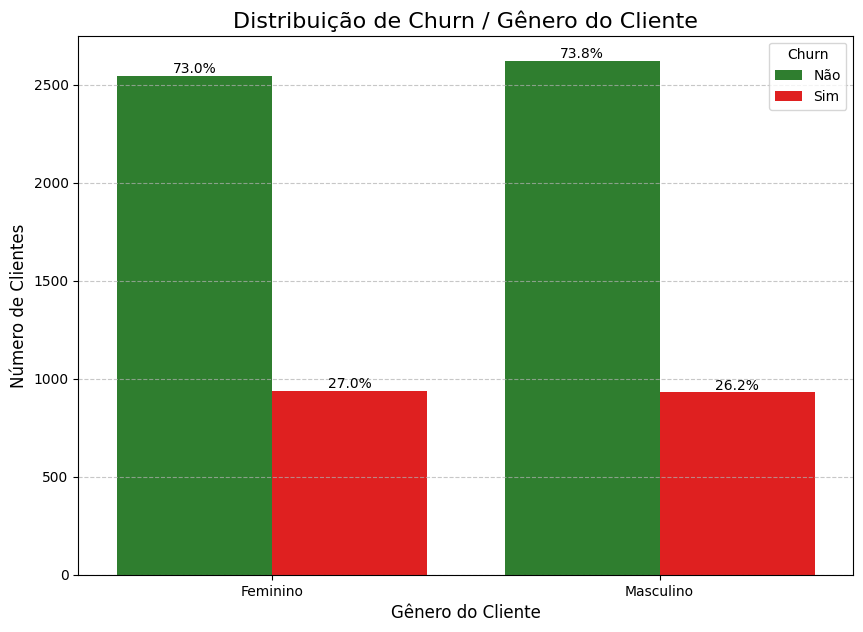

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Agrupar o DataFrame por 'genero_cliente' e 'churn' e contar ocorrências
churn_gender_counts = df_analise.groupby(['genero_cliente', 'churn']).size().unstack(fill_value=0)

# 2. Calcular a porcentagem de churn para cada gênero
churn_gender_percentages = churn_gender_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Preparar os dados para o countplot com porcentagens
df_plot = df_analise.groupby(['genero_cliente', 'churn']).size().reset_index(name='counts')

plt.figure(figsize=(10, 7))
ax = sns.barplot(x='genero_cliente', y='counts', hue='churn', data=df_plot, palette={'Sim': '#FF0000', 'Não': '#228B22'})

plt.title('Distribuição de Churn / Gênero do Cliente', fontsize=16)
plt.xlabel('Gênero do Cliente', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Get the unique genders in the order they appear on the x-axis
genders_order = df_plot['genero_cliente'].unique()

# Iterate over the bar containers to get 'Não' (no churn) bars and 'Sim' (churn) bars
if len(ax.containers) > 1: # Ensure there are at least two containers (for 'Não' and 'Sim')
    # Container for 'Não' (No Churn) bars
    nao_bars = ax.containers[0]
    # Container for 'Sim' (Churn) bars
    sim_bars = ax.containers[1]

    # Annotate 'Não' (No Churn) bars
    for i, bar in enumerate(nao_bars):
        gender = genders_order[i]
        percentage = churn_gender_percentages.loc[gender, 'Não']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

    # Annotate 'Sim' (Churn) bars
    for i, bar in enumerate(sim_bars):
        gender = genders_order[i]
        percentage = churn_gender_percentages.loc[gender, 'Sim']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.legend(title='Churn')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 2. Status Cliente Sênior

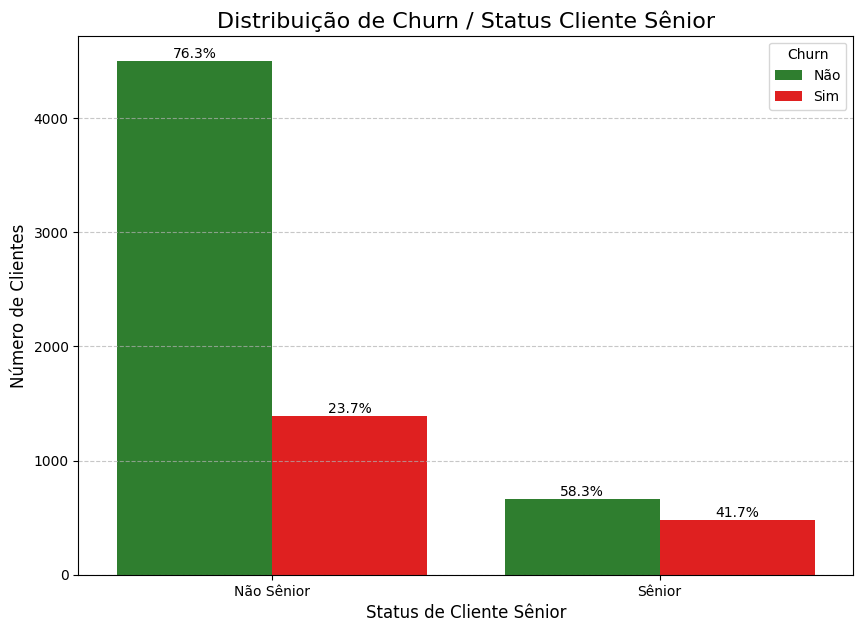

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Mapear 0 e 1 para 'Não Sênior' e 'Sênior' para melhor visualização
df_analise['cliente_senior_label'] = df_analise['cliente_senior'].map({0: 'Não Sênior', 1: 'Sênior'})

# 1. Agrupar o DataFrame por 'cliente_senior_label' e 'churn' e contar ocorrências
churn_senior_counts = df_analise.groupby(['cliente_senior_label', 'churn']).size().unstack(fill_value=0)

# 2. Calcular a porcentagem de churn para cada grupo de cliente sênior
churn_senior_percentages = churn_senior_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Preparar os dados para o countplot com contagens
df_plot_senior = df_analise.groupby(['cliente_senior_label', 'churn']).size().reset_index(name='counts')

plt.figure(figsize=(10, 7))
ax = sns.barplot(x='cliente_senior_label', y='counts', hue='churn', data=df_plot_senior, palette={'Sim': '#FF0000', 'Não': '#228B22'})

plt.title('Distribuição de Churn / Status Cliente Sênior', fontsize=16)
plt.xlabel('Status de Cliente Sênior', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Get the unique senior status labels in the order they appear on the x-axis
senior_labels_order = df_plot_senior['cliente_senior_label'].unique()

# Iterate over the bar containers to get 'Não' (no churn) bars and 'Sim' (churn) bars
if len(ax.containers) > 1: # Ensure there are at least two containers (for 'Não' and 'Sim')
    # Container for 'Não' (No Churn) bars
    nao_bars = ax.containers[0]
    # Container for 'Sim' (Churn) bars
    sim_bars = ax.containers[1]

    # Annotate 'Não' (No Churn) bars
    for i, bar in enumerate(nao_bars):
        senior_status = senior_labels_order[i]
        percentage = churn_senior_percentages.loc[senior_status, 'Não']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

    # Annotate 'Sim' (Churn) bars
    for i, bar in enumerate(sim_bars):
        senior_status = senior_labels_order[i]
        percentage = churn_senior_percentages.loc[senior_status, 'Sim']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.legend(title='Churn')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 3. Status Parceiro

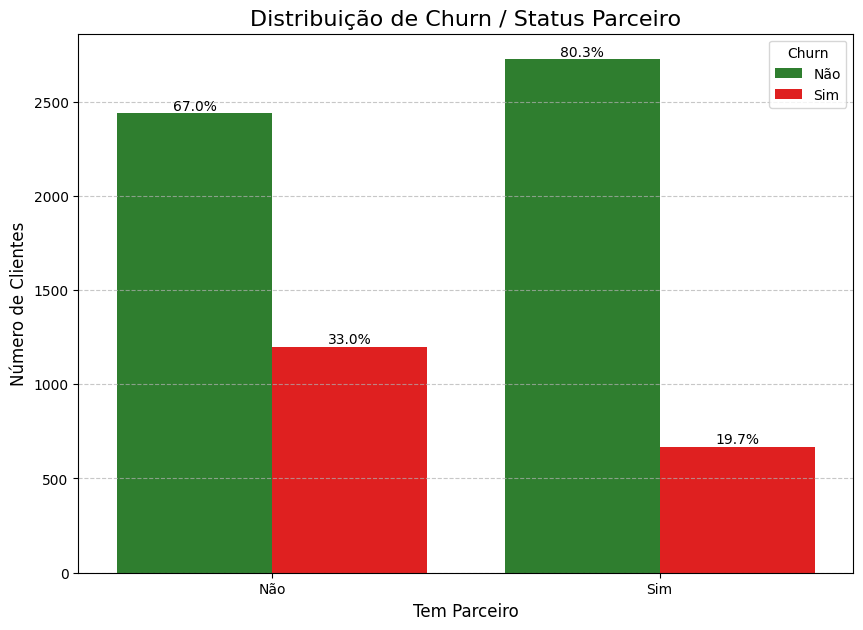

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Agrupar o DataFrame por 'tem_parceiro' e 'churn' e contar ocorrências
churn_partner_counts = df_analise.groupby(['tem_parceiro', 'churn']).size().unstack(fill_value=0)

# 2. Calcular a porcentagem de churn para cada grupo de parceiro
churn_partner_percentages = churn_partner_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Preparar os dados para o countplot com contagens
df_plot_partner = df_analise.groupby(['tem_parceiro', 'churn']).size().reset_index(name='counts')

plt.figure(figsize=(10, 7))
ax = sns.barplot(x='tem_parceiro', y='counts', hue='churn', data=df_plot_partner, palette={'Sim': '#FF0000', 'Não': '#228B22'})

plt.title('Distribuição de Churn / Status Parceiro', fontsize=16)
plt.xlabel('Tem Parceiro', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Get the unique partner status labels in the order they appear on the x-axis
partner_labels_order = df_plot_partner['tem_parceiro'].unique()

# Iterate over the bar containers to get 'Não' (no churn) bars and 'Sim' (churn) bars
if len(ax.containers) > 1: # Ensure there are at least two containers (for 'Não' and 'Sim')
    # Container for 'Não' (No Churn) bars
    nao_bars = ax.containers[0]
    # Container for 'Sim' (Churn) bars
    sim_bars = ax.containers[1]

    # Annotate 'Não' (No Churn) bars
    for i, bar in enumerate(nao_bars):
        partner_status = partner_labels_order[i]
        percentage = churn_partner_percentages.loc[partner_status, 'Não']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

    # Annotate 'Sim' (Churn) bars
    for i, bar in enumerate(sim_bars):
        partner_status = partner_labels_order[i]
        percentage = churn_partner_percentages.loc[partner_status, 'Sim']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.legend(title='Churn')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 4. Status Dependentes

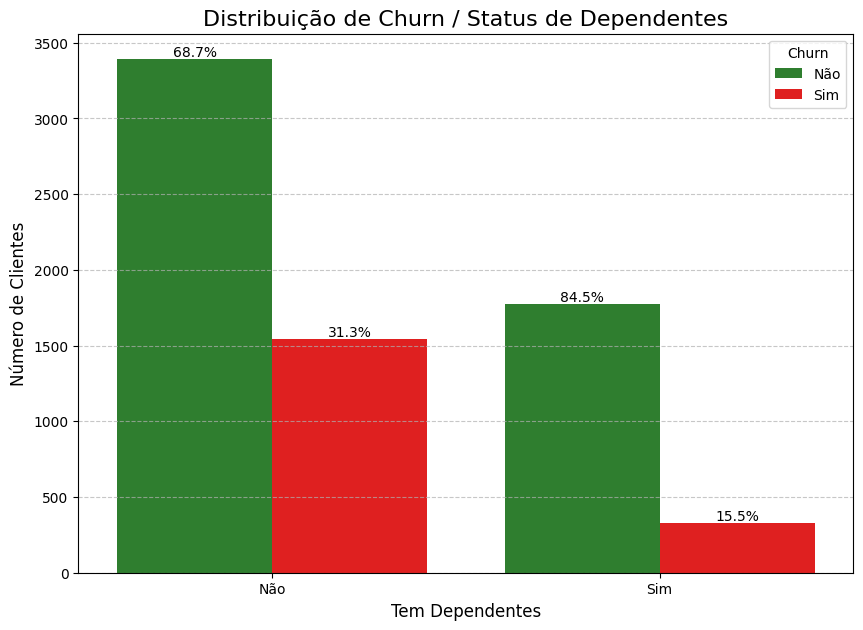

In [61]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Agrupar o DataFrame por 'tem_dependentes' e 'churn' e contar ocorrências
churn_dependents_counts = df_analise.groupby(['tem_dependentes', 'churn']).size().unstack(fill_value=0)

# 2. Calcular a porcentagem de churn para cada grupo de dependentes
churn_dependents_percentages = churn_dependents_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Preparar os dados para o countplot com contagens
df_plot_dependents = df_analise.groupby(['tem_dependentes', 'churn']).size().reset_index(name='counts')

plt.figure(figsize=(10, 7))
ax = sns.barplot(x='tem_dependentes', y='counts', hue='churn', data=df_plot_dependents, palette={'Sim': '#FF0000', 'Não': '#228B22'})

plt.title('Distribuição de Churn / Status de Dependentes', fontsize=16)
plt.xlabel('Tem Dependentes', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Get the unique dependent status labels in the order they appear on the x-axis
dependent_labels_order = df_plot_dependents['tem_dependentes'].unique()

# Iterate over the bar containers to get 'Não' (no churn) bars and 'Sim' (churn) bars
if len(ax.containers) > 1: # Ensure there are at least two containers (for 'Não' and 'Sim')
    # Container for 'Não' (No Churn) bars
    nao_bars = ax.containers[0]
    # Container for 'Sim' (Churn) bars
    sim_bars = ax.containers[1]

    # Annotate 'Não' (No Churn) bars
    for i, bar in enumerate(nao_bars):
        dependent_status = dependent_labels_order[i]
        percentage = churn_dependents_percentages.loc[dependent_status, 'Não']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

    # Annotate 'Sim' (Churn) bars
    for i, bar in enumerate(sim_bars):
        dependent_status = dependent_labels_order[i]
        percentage = churn_dependents_percentages.loc[dependent_status, 'Sim']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.legend(title='Churn')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 5. Serviço Telefone

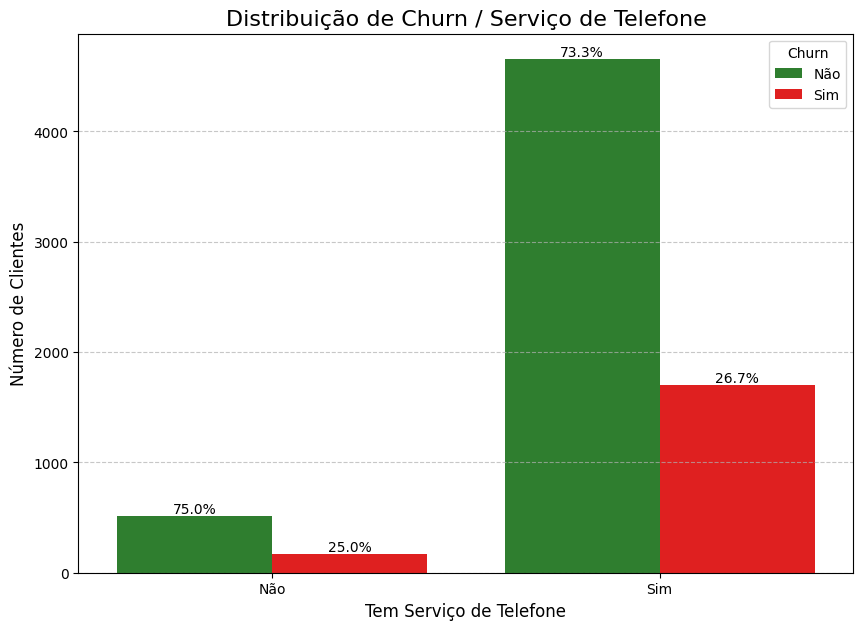

In [62]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Agrupar o DataFrame por 'servico_telefone' e 'churn' e contar ocorrências
churn_phone_counts = df_analise.groupby(['servico_telefone', 'churn']).size().unstack(fill_value=0)

# 2. Calcular a porcentagem de churn para cada grupo de serviço de telefone
churn_phone_percentages = churn_phone_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Preparar os dados para o countplot com contagens
df_plot_phone = df_analise.groupby(['servico_telefone', 'churn']).size().reset_index(name='counts')

plt.figure(figsize=(10, 7))
ax = sns.barplot(x='servico_telefone', y='counts', hue='churn', data=df_plot_phone, palette={'Sim': '#FF0000', 'Não': '#228B22'})

plt.title('Distribuição de Churn / Serviço de Telefone', fontsize=16)
plt.xlabel('Tem Serviço de Telefone', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Get the unique phone service labels in the order they appear on the x-axis
phone_labels_order = df_plot_phone['servico_telefone'].unique()

# Iterate over the bar containers to get 'Não' (no churn) bars and 'Sim' (churn) bars
if len(ax.containers) > 1: # Ensure there are at least two containers (for 'Não' and 'Sim')
    # Container for 'Não' (No Churn) bars
    nao_bars = ax.containers[0]
    # Container for 'Sim' (Churn) bars
    sim_bars = ax.containers[1]

    # Annotate 'Não' (No Churn) bars
    for i, bar in enumerate(nao_bars):
        phone_status = phone_labels_order[i]
        percentage = churn_phone_percentages.loc[phone_status, 'Não']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

    # Annotate 'Sim' (Churn) bars
    for i, bar in enumerate(sim_bars):
        phone_status = phone_labels_order[i]
        percentage = churn_phone_percentages.loc[phone_status, 'Sim']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.legend(title='Churn')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 6. Fatura Digital

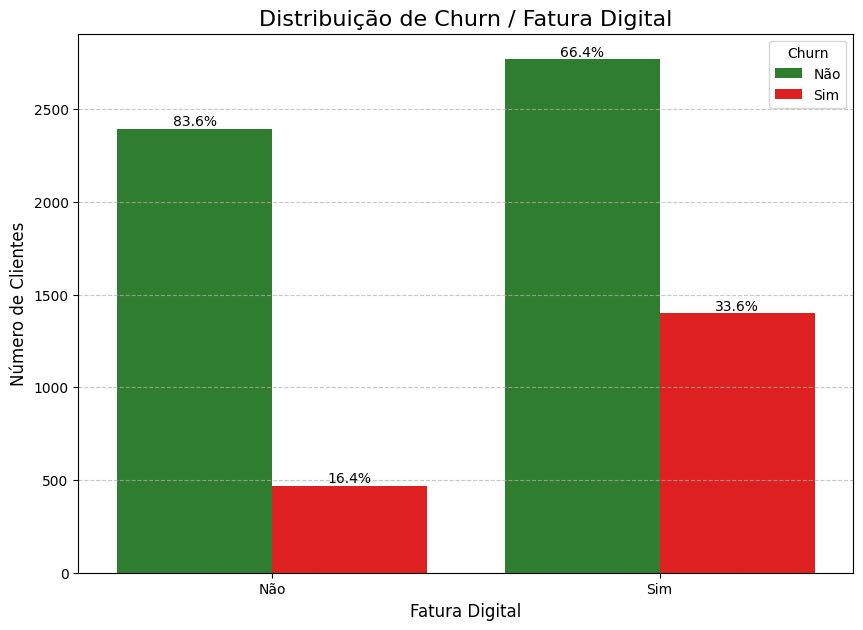

In [63]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Agrupar o DataFrame por 'fatura_digital' e 'churn' e contar ocorrências
churn_paperless_counts = df_analise.groupby(['fatura_digital', 'churn']).size().unstack(fill_value=0)

# 2. Calcular a porcentagem de churn para cada grupo de fatura_digital
churn_paperless_percentages = churn_paperless_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Preparar os dados para o countplot com contagens
df_plot_paperless = df_analise.groupby(['fatura_digital', 'churn']).size().reset_index(name='counts')

plt.figure(figsize=(10, 7))
ax = sns.barplot(x='fatura_digital', y='counts', hue='churn', data=df_plot_paperless, palette={'Sim': '#FF0000', 'Não': '#228B22'})

plt.title('Distribuição de Churn / Fatura Digital', fontsize=16)
plt.xlabel('Fatura Digital', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Get the unique paperless billing labels in the order they appear on the x-axis
paperless_labels_order = df_plot_paperless['fatura_digital'].unique()

# Iterate over the bar containers to get 'Não' (no churn) bars and 'Sim' (churn) bars
if len(ax.containers) > 1: # Ensure there are at least two containers (for 'Não' and 'Sim')
    # Container for 'Não' (No Churn) bars
    nao_bars = ax.containers[0]
    # Container for 'Sim' (Churn) bars
    sim_bars = ax.containers[1]

    # Annotate 'Não' (No Churn) bars
    for i, bar in enumerate(nao_bars):
        paperless_status = paperless_labels_order[i]
        percentage = churn_paperless_percentages.loc[paperless_status, 'Não']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

    # Annotate 'Sim' (Churn) bars
    for i, bar in enumerate(sim_bars):
        paperless_status = paperless_labels_order[i]
        percentage = churn_paperless_percentages.loc[paperless_status, 'Sim']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.legend(title='Churn')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 7. Tipo de Contrato

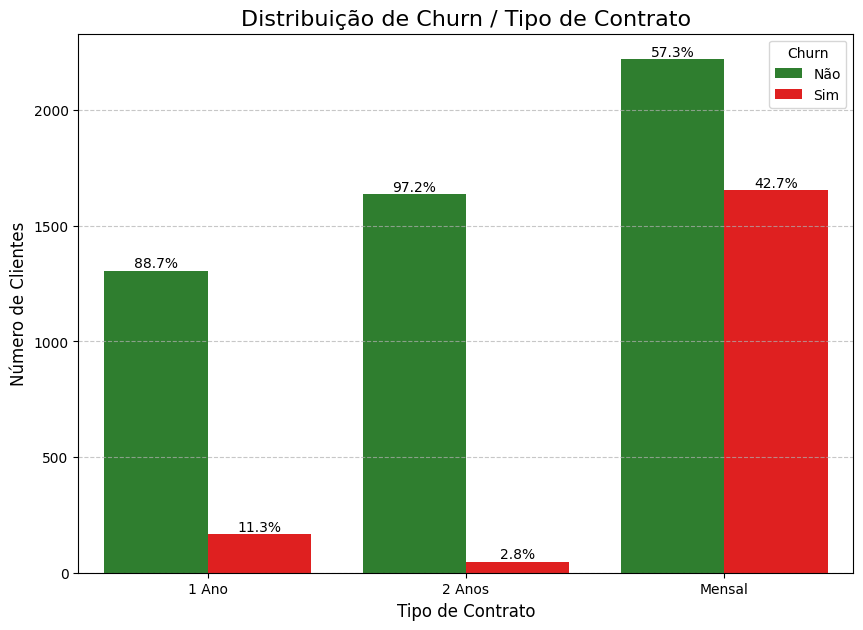

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Recuperar a coluna original de contrato do df_analise para agrupar e plotar
# Como 'account.Contract' foi one-hot encoded, vamos usar o df original temporariamente para o agrupamento
# Ou, alternativamente, podemos inferir o tipo de contrato a partir das colunas codificadas em df_analise
# Vamos criar uma coluna 'contrato_original' no df_analise para facilitar

def get_contract_type(row):
    if row['contrato_dois_anos'] == True:
        return '2 Anos'
    elif row['contrato_um_ano'] == True:
        return '1 Ano'
    else:
        return 'Mensal'

df_analise['contrato_original'] = df_analise.apply(get_contract_type, axis=1)

# 1. Agrupar o DataFrame por 'contrato_original' e 'churn' e contar ocorrências
churn_contract_counts = df_analise.groupby(['contrato_original', 'churn']).size().unstack(fill_value=0)

# 2. Calcular a porcentagem de churn para cada tipo de contrato
churn_contract_percentages = churn_contract_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Preparar os dados para o countplot com contagens
df_plot_contract = df_analise.groupby(['contrato_original', 'churn']).size().reset_index(name='counts')

plt.figure(figsize=(10, 7))
ax = sns.barplot(x='contrato_original', y='counts', hue='churn', data=df_plot_contract, palette={'Sim': '#FF0000', 'Não': '#228B22'})

plt.title('Distribuição de Churn / Tipo de Contrato', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Get the unique contract labels in the order they appear on the x-axis
contract_labels_order = df_plot_contract['contrato_original'].unique()

# Iterate over the bar containers to get 'Não' (no churn) bars and 'Sim' (churn) bars
if len(ax.containers) > 1: # Ensure there are at least two containers (for 'Não' and 'Sim')
    # Container for 'Não' (No Churn) bars
    nao_bars = ax.containers[0]
    # Container for 'Sim' (Churn) bars
    sim_bars = ax.containers[1]

    # Annotate 'Não' (No Churn) bars
    for i, bar in enumerate(nao_bars):
        contract_status = contract_labels_order[i]
        percentage = churn_contract_percentages.loc[contract_status, 'Não']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

    # Annotate 'Sim' (Churn) bars
    for i, bar in enumerate(sim_bars):
        contract_status = contract_labels_order[i]
        percentage = churn_contract_percentages.loc[contract_status, 'Sim']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.legend(title='Churn')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 8. Método de Pagamento

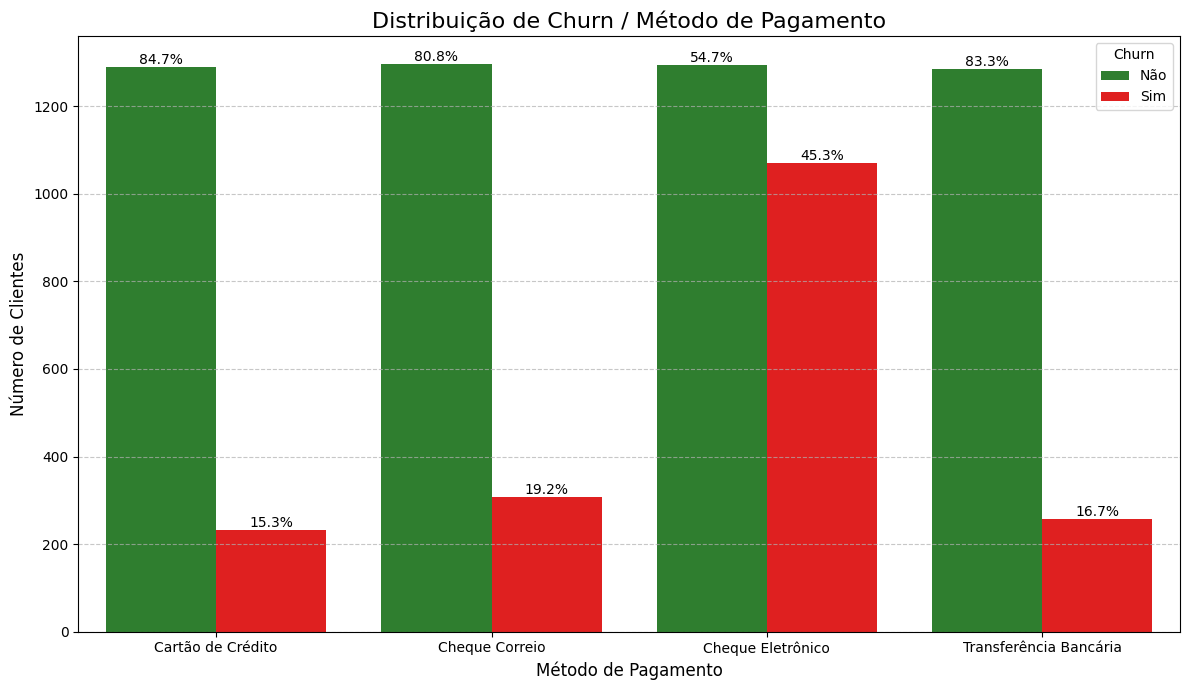

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Função para reconstruir a coluna original 'metodo_pagamento'
def get_payment_method(row):
    if row['pag_cheque_eletronico'] == True:
        return 'Cheque Eletrônico'
    elif row['pag_cheque_correio'] == True:
        return 'Cheque Correio'
    elif row['pag_cartao_cred_auto'] == True:
        return 'Cartão de Crédito'
    else:
        return 'Transferência Bancária' # Essa é a categoria base (drop_first=True)

df_analise['metodo_pagamento'] = df_analise.apply(get_payment_method, axis=1)

# 1. Agrupar o DataFrame por 'metodo_pagamento' e 'churn' e contar ocorrências
churn_payment_counts = df_analise.groupby(['metodo_pagamento', 'churn']).size().unstack(fill_value=0)

# 2. Calcular a porcentagem de churn para cada tipo de método de pagamento
churn_payment_percentages = churn_payment_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Preparar os dados para o countplot com contagens
df_plot_payment = df_analise.groupby(['metodo_pagamento', 'churn']).size().reset_index(name='counts')

plt.figure(figsize=(12, 7))
ax = sns.barplot(x='metodo_pagamento', y='counts', hue='churn', data=df_plot_payment, palette={'Sim': '#FF0000', 'Não': '#228B22'})

plt.title('Distribuição de Churn / Método de Pagamento', fontsize=16)
plt.xlabel('Método de Pagamento', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Get the unique payment method labels in the order they appear on the x-axis
payment_labels_order = df_plot_payment['metodo_pagamento'].unique()

# Iterate over the bar containers to get 'Não' (no churn) bars and 'Sim' (churn) bars
if len(ax.containers) > 1: # Ensure there are at least two containers (for 'Não' and 'Sim')
    # Container for 'Não' (No Churn) bars
    nao_bars = ax.containers[0]
    # Container for 'Sim' (Churn) bars
    sim_bars = ax.containers[1]

    # Annotate 'Não' (No Churn) bars
    for i, bar in enumerate(nao_bars):
        payment_status = payment_labels_order[i]
        percentage = churn_payment_percentages.loc[payment_status, 'Não']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

    # Annotate 'Sim' (Churn) bars
    for i, bar in enumerate(sim_bars):
        payment_status = payment_labels_order[i]
        percentage = churn_payment_percentages.loc[payment_status, 'Sim']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.legend(title='Churn')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

#### 9. Tipo de Serviço de Internet

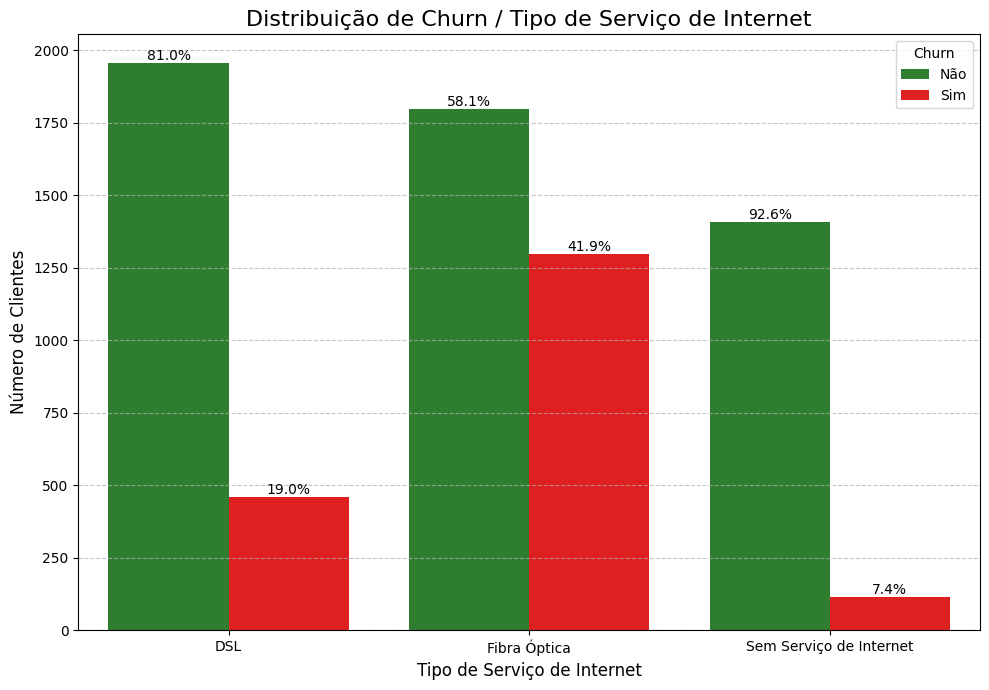

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Função para reconstruir a coluna original 'tipo_internet'
def get_internet_service_type(row):
    if row['internet_fibra_optica'] == True:
        return 'Fibra Óptica'
    elif row['internet_sem_servico'] == True:
        return 'Sem Serviço de Internet'
    else:
        return 'DSL' # DSL é a categoria base (drop_first=True)

df_analise['tipo_internet'] = df_analise.apply(get_internet_service_type, axis=1)

# 1. Agrupar o DataFrame por 'tipo_internet' e 'churn' e contar ocorrências
churn_internet_counts = df_analise.groupby(['tipo_internet', 'churn']).size().unstack(fill_value=0)

# 2. Calcular a porcentagem de churn para cada tipo de serviço de internet
churn_internet_percentages = churn_internet_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Preparar os dados para o countplot com contagens
df_plot_internet = df_analise.groupby(['tipo_internet', 'churn']).size().reset_index(name='counts')

plt.figure(figsize=(10, 7))
ax = sns.barplot(x='tipo_internet', y='counts', hue='churn', data=df_plot_internet, palette={'Sim': '#FF0000', 'Não': '#228B22'})

plt.title('Distribuição de Churn / Tipo de Serviço de Internet', fontsize=16)
plt.xlabel('Tipo de Serviço de Internet', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Get the unique internet service labels in the order they appear on the x-axis
internet_labels_order = df_plot_internet['tipo_internet'].unique()

# Iterate over the bar containers to get 'Não' (no churn) bars and 'Sim' (churn) bars
if len(ax.containers) > 1: # Ensure there are at least two containers (for 'Não' and 'Sim')
    # Container for 'Não' (No Churn) bars
    nao_bars = ax.containers[0]
    # Container for 'Sim' (Churn) bars
    sim_bars = ax.containers[1]

    # Annotate 'Não' (No Churn) bars
    for i, bar in enumerate(nao_bars):
        internet_status = internet_labels_order[i]
        percentage = churn_internet_percentages.loc[internet_status, 'Não']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

    # Annotate 'Sim' (Churn) bars
    for i, bar in enumerate(sim_bars):
        internet_status = internet_labels_order[i]
        percentage = churn_internet_percentages.loc[internet_status, 'Sim']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.legend(title='Churn')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 10. Segurança Online

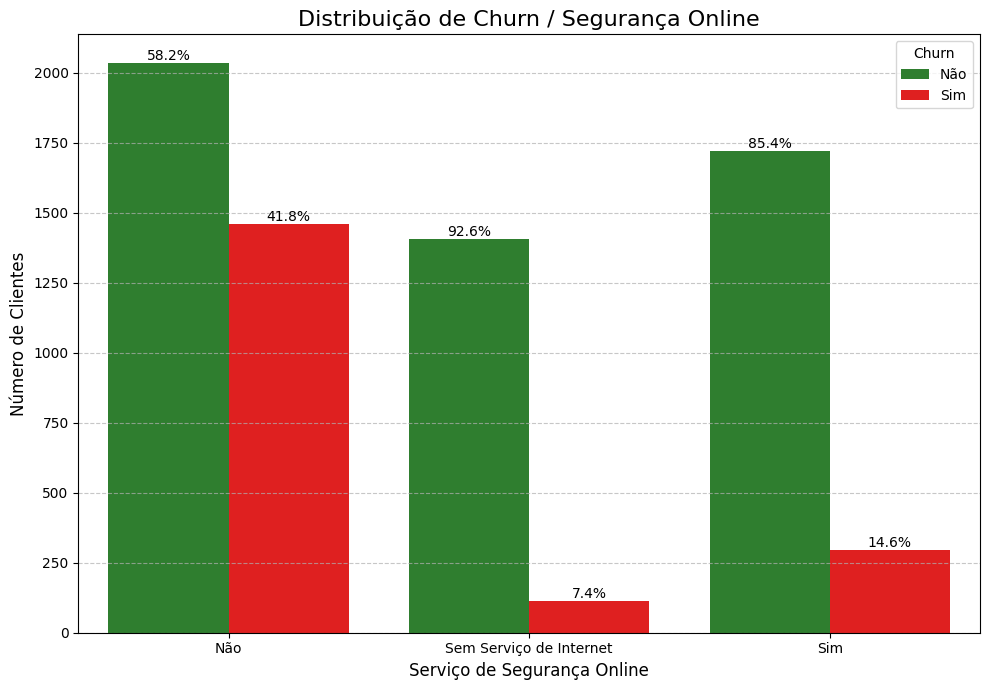

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Função para reconstruir a coluna original 'seguranca_online'
def get_online_security_type(row):
    if row['seg_online_sim'] == True:
        return 'Sim'
    elif row['seg_online_sem_internet'] == True:
        return 'Sem Serviço de Internet'
    else:
        return 'Não' # Categoria base

df_analise['seguranca_online'] = df_analise.apply(get_online_security_type, axis=1)

# 1. Agrupar o DataFrame por 'seguranca_online' e 'churn' e contar ocorrências
churn_online_security_counts = df_analise.groupby(['seguranca_online', 'churn']).size().unstack(fill_value=0)

# 2. Calcular a porcentagem de churn para cada tipo de serviço de segurança online
churn_online_security_percentages = churn_online_security_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Preparar os dados para o countplot com contagens
df_plot_online_security = df_analise.groupby(['seguranca_online', 'churn']).size().reset_index(name='counts')

plt.figure(figsize=(10, 7))
ax = sns.barplot(x='seguranca_online', y='counts', hue='churn', data=df_plot_online_security, palette={'Sim': '#FF0000', 'Não': '#228B22'})

plt.title('Distribuição de Churn / Segurança Online', fontsize=16)
plt.xlabel('Serviço de Segurança Online', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Get the unique labels in the order they appear on the x-axis
online_security_labels_order = df_plot_online_security['seguranca_online'].unique()

# Iterate over the bar containers to get 'Não' (no churn) bars and 'Sim' (churn) bars
if len(ax.containers) > 1: # Ensure there are at least two containers (for 'Não' and 'Sim')
    # Container for 'Não' (No Churn) bars
    nao_bars = ax.containers[0]
    # Container for 'Sim' (Churn) bars
    sim_bars = ax.containers[1]

    # Annotate 'Não' (No Churn) bars
    for i, bar in enumerate(nao_bars):
        security_status = online_security_labels_order[i]
        percentage = churn_online_security_percentages.loc[security_status, 'Não']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

    # Annotate 'Sim' (Churn) bars
    for i, bar in enumerate(sim_bars):
        security_status = online_security_labels_order[i]
        percentage = churn_online_security_percentages.loc[security_status, 'Sim']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.legend(title='Churn')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 11. Backup Online

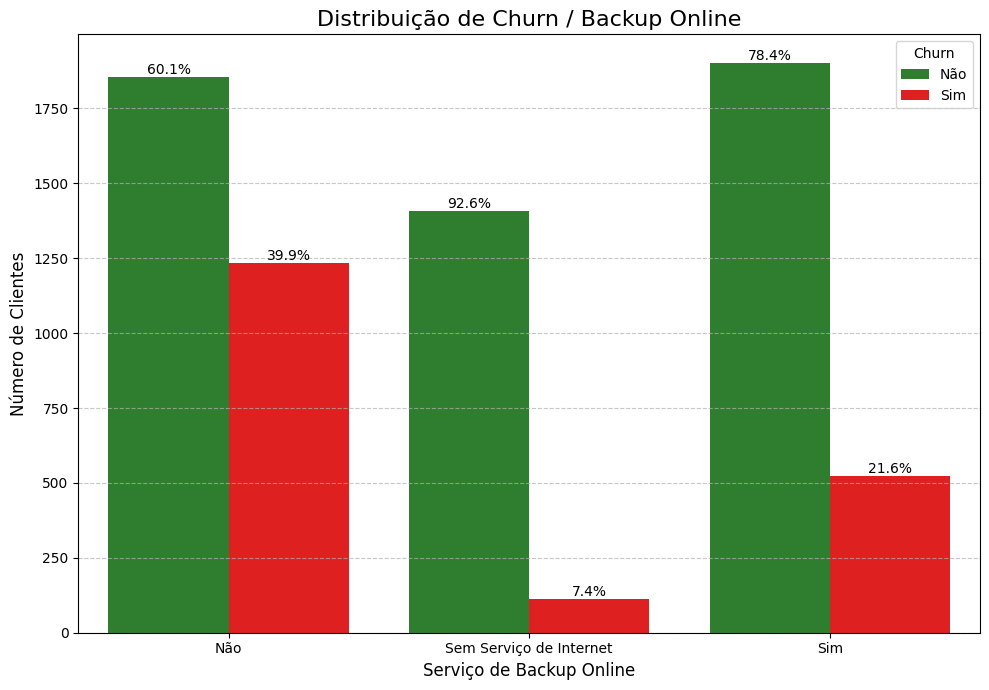

In [64]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Função para reconstruir a coluna original 'backup_online'
def get_online_backup_type(row):
    if row['backup_online_sim'] == True:
        return 'Sim'
    elif row['backup_online_sem_internet'] == True:
        return 'Sem Serviço de Internet'
    else:
        return 'Não' # Categoria base

df_analise['backup_online'] = df_analise.apply(get_online_backup_type, axis=1)

# 1. Agrupar o DataFrame por 'backup_online' e 'churn' e contar ocorrências
churn_online_backup_counts = df_analise.groupby(['backup_online', 'churn']).size().unstack(fill_value=0)

# 2. Calcular a porcentagem de churn para cada tipo de serviço de backup online
churn_online_backup_percentages = churn_online_backup_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Preparar os dados para o countplot com contagens
df_plot_online_backup = df_analise.groupby(['backup_online', 'churn']).size().reset_index(name='counts')

plt.figure(figsize=(10, 7))
ax = sns.barplot(x='backup_online', y='counts', hue='churn', data=df_plot_online_backup, palette={'Sim': '#FF0000', 'Não': '#228B22'})

plt.title('Distribuição de Churn / Backup Online', fontsize=16)
plt.xlabel('Serviço de Backup Online', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Get the unique labels in the order they appear on the x-axis
online_backup_labels_order = df_plot_online_backup['backup_online'].unique()

# Iterate over the bar containers to get 'Não' (no churn) bars and 'Sim' (churn) bars
if len(ax.containers) > 1: # Ensure there are at least two containers (for 'Não' and 'Sim')
    # Container for 'Não' (No Churn) bars
    nao_bars = ax.containers[0]
    # Container for 'Sim' (Churn) bars
    sim_bars = ax.containers[1]

    # Annotate 'Não' (No Churn) bars
    for i, bar in enumerate(nao_bars):
        backup_status = online_backup_labels_order[i]
        percentage = churn_online_backup_percentages.loc[backup_status, 'Não']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

    # Annotate 'Sim' (Churn) bars
    for i, bar in enumerate(sim_bars):
        backup_status = online_backup_labels_order[i]
        percentage = churn_online_backup_percentages.loc[backup_status, 'Sim']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.legend(title='Churn')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 12. Proteção de Dispositivo

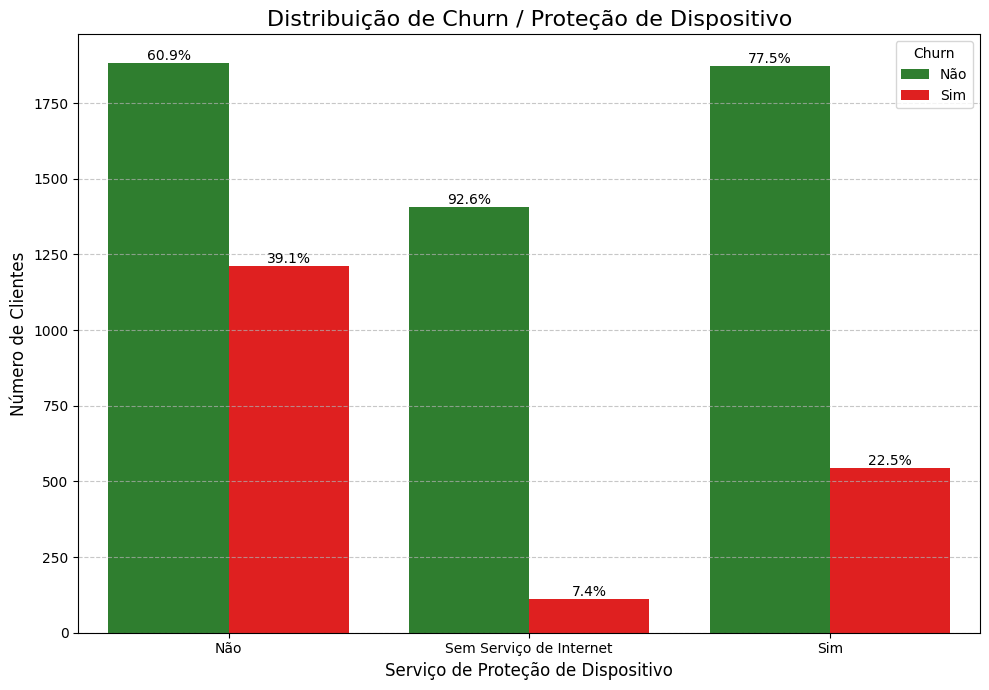

In [65]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Função para reconstruir a coluna original 'protecao_disp'
def get_device_protection_type(row):
    if row['protecao_disp_sim'] == True:
        return 'Sim'
    elif row['protecao_disp_sem_internet'] == True:
        return 'Sem Serviço de Internet'
    else:
        return 'Não' # Categoria base

df_analise['protecao_disp'] = df_analise.apply(get_device_protection_type, axis=1)

# 1. Agrupar o DataFrame por 'protecao_disp' e 'churn' e contar ocorrências
churn_device_protection_counts = df_analise.groupby(['protecao_disp', 'churn']).size().unstack(fill_value=0)

# 2. Calcular a porcentagem de churn para cada tipo de serviço de proteção de dispositivo
churn_device_protection_percentages = churn_device_protection_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Preparar os dados para o countplot com contagens
df_plot_device_protection = df_analise.groupby(['protecao_disp', 'churn']).size().reset_index(name='counts')

plt.figure(figsize=(10, 7))
ax = sns.barplot(x='protecao_disp', y='counts', hue='churn', data=df_plot_device_protection, palette={'Sim': '#FF0000', 'Não': '#228B22'})

plt.title('Distribuição de Churn / Proteção de Dispositivo', fontsize=16)
plt.xlabel('Serviço de Proteção de Dispositivo', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Get the unique labels in the order they appear on the x-axis
device_protection_labels_order = df_plot_device_protection['protecao_disp'].unique()

# Iterate over the bar containers to get 'Não' (no churn) bars and 'Sim' (churn) bars
if len(ax.containers) > 1: # Ensure there are at least two containers (for 'Não' and 'Sim')
    # Container for 'Não' (No Churn) bars
    nao_bars = ax.containers[0]
    # Container for 'Sim' (Churn) bars
    sim_bars = ax.containers[1]

    # Annotate 'Não' (No Churn) bars
    for i, bar in enumerate(nao_bars):
        protection_status = device_protection_labels_order[i]
        percentage = churn_device_protection_percentages.loc[protection_status, 'Não']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

    # Annotate 'Sim' (Churn) bars
    for i, bar in enumerate(sim_bars):
        protection_status = device_protection_labels_order[i]
        percentage = churn_device_protection_percentages.loc[protection_status, 'Sim']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.legend(title='Churn')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 13. Suporte Técnico

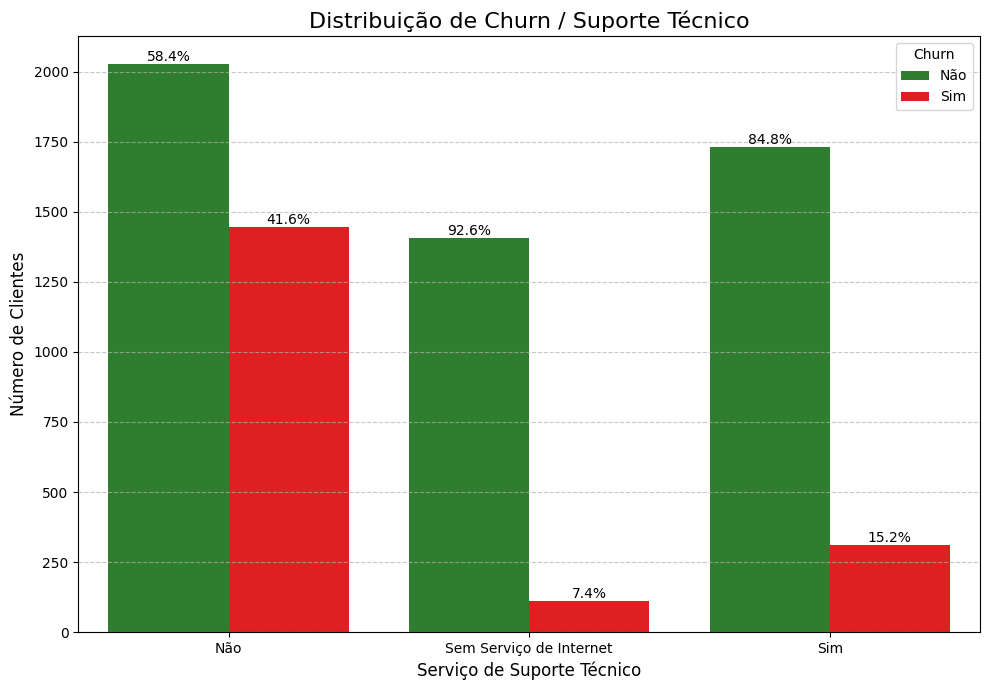

In [66]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Função para reconstruir a coluna original 'suporte_tec'
def get_tech_support_type(row):
    if row['suporte_tec_sim'] == True:
        return 'Sim'
    elif row['suporte_tec_sem_internet'] == True:
        return 'Sem Serviço de Internet'
    else:
        return 'Não' # Categoria base

df_analise['suporte_tec'] = df_analise.apply(get_tech_support_type, axis=1)

# 1. Agrupar o DataFrame por 'suporte_tec' e 'churn' e contar ocorrências
churn_tech_support_counts = df_analise.groupby(['suporte_tec', 'churn']).size().unstack(fill_value=0)

# 2. Calcular a porcentagem de churn para cada tipo de serviço de suporte técnico
churn_tech_support_percentages = churn_tech_support_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Preparar os dados para o countplot com contagens
df_plot_tech_support = df_analise.groupby(['suporte_tec', 'churn']).size().reset_index(name='counts')

plt.figure(figsize=(10, 7))
ax = sns.barplot(x='suporte_tec', y='counts', hue='churn', data=df_plot_tech_support, palette={'Sim': '#FF0000', 'Não': '#228B22'})

plt.title('Distribuição de Churn / Suporte Técnico', fontsize=16)
plt.xlabel('Serviço de Suporte Técnico', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Get the unique labels in the order they appear on the x-axis
tech_support_labels_order = df_plot_tech_support['suporte_tec'].unique()

# Iterate over the bar containers to get 'Não' (no churn) bars and 'Sim' (churn) bars
if len(ax.containers) > 1: # Ensure there are at least two containers (for 'Não' and 'Sim')
    # Container for 'Não' (No Churn) bars
    nao_bars = ax.containers[0]
    # Container for 'Sim' (Churn) bars
    sim_bars = ax.containers[1]

    # Annotate 'Não' (No Churn) bars
    for i, bar in enumerate(nao_bars):
        tech_support_status = tech_support_labels_order[i]
        percentage = churn_tech_support_percentages.loc[tech_support_status, 'Não']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

    # Annotate 'Sim' (Churn) bars
    for i, bar in enumerate(sim_bars):
        tech_support_status = tech_support_labels_order[i]
        percentage = churn_tech_support_percentages.loc[tech_support_status, 'Sim']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.legend(title='Churn')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 14. Streaming TV

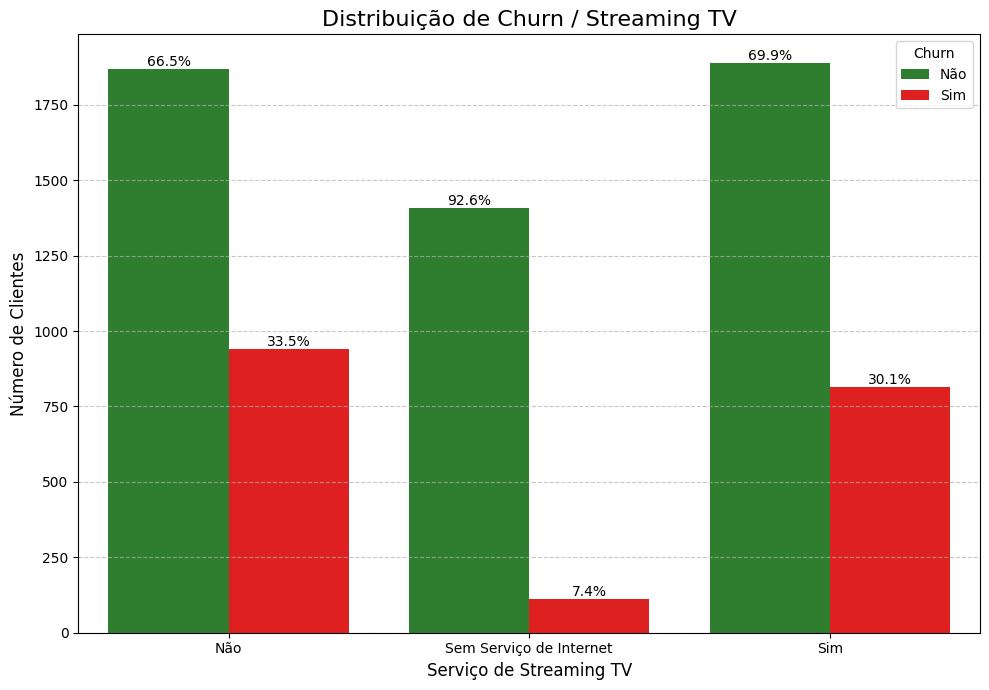

In [67]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Função para reconstruir a coluna original 'tv_stream'
def get_streaming_tv_type(row):
    if row['tv_stream_sim'] == True:
        return 'Sim'
    elif row['tv_stream_sem_internet'] == True:
        return 'Sem Serviço de Internet'
    else:
        return 'Não' # Categoria base

df_analise['tv_stream'] = df_analise.apply(get_streaming_tv_type, axis=1)

# 1. Agrupar o DataFrame por 'tv_stream' e 'churn' e contar ocorrências
churn_streaming_tv_counts = df_analise.groupby(['tv_stream', 'churn']).size().unstack(fill_value=0)

# 2. Calcular a porcentagem de churn para cada tipo de serviço de streaming de TV
churn_streaming_tv_percentages = churn_streaming_tv_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Preparar os dados para o countplot com contagens
df_plot_streaming_tv = df_analise.groupby(['tv_stream', 'churn']).size().reset_index(name='counts')

plt.figure(figsize=(10, 7))
ax = sns.barplot(x='tv_stream', y='counts', hue='churn', data=df_plot_streaming_tv, palette={'Sim': '#FF0000', 'Não': '#228B22'})

plt.title('Distribuição de Churn / Streaming TV', fontsize=16)
plt.xlabel('Serviço de Streaming TV', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Get the unique labels in the order they appear on the x-axis
streaming_tv_labels_order = df_plot_streaming_tv['tv_stream'].unique()

# Iterate over the bar containers to get 'Não' (no churn) bars and 'Sim' (churn) bars
if len(ax.containers) > 1: # Ensure there are at least two containers (for 'Não' and 'Sim')
    # Container for 'Não' (No Churn) bars
    nao_bars = ax.containers[0]
    # Container for 'Sim' (Churn) bars
    sim_bars = ax.containers[1]

    # Annotate 'Não' (No Churn) bars
    for i, bar in enumerate(nao_bars):
        tv_status = streaming_tv_labels_order[i]
        percentage = churn_streaming_tv_percentages.loc[tv_status, 'Não']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

    # Annotate 'Sim' (Churn) bars
    for i, bar in enumerate(sim_bars):
        tv_status = streaming_tv_labels_order[i]
        percentage = churn_streaming_tv_percentages.loc[tv_status, 'Sim']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.legend(title='Churn')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 15. Streaming Filmes

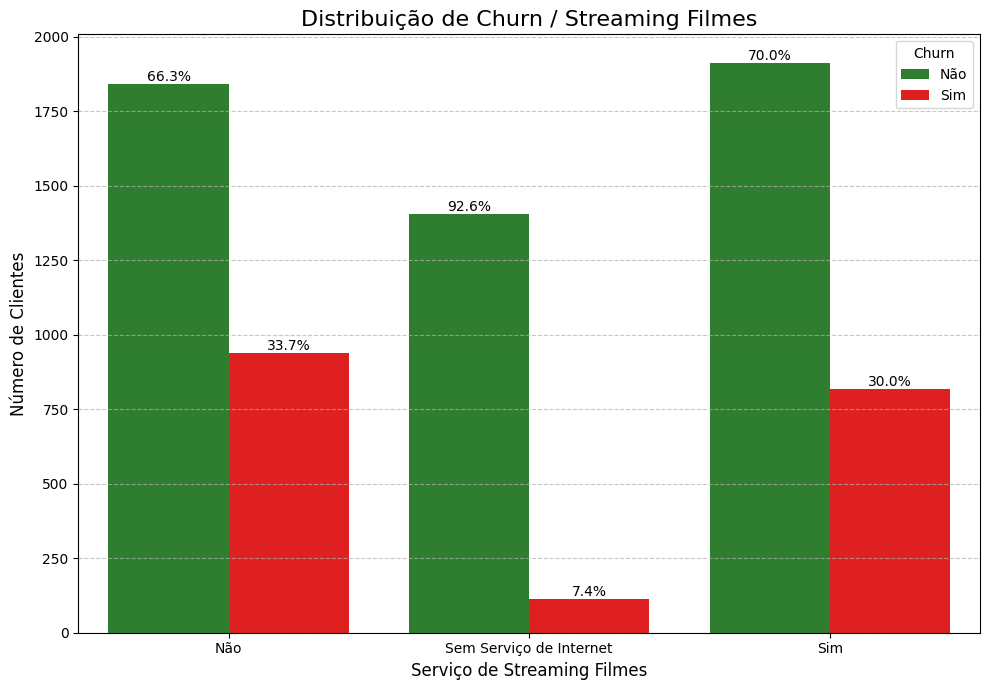

In [68]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Função para reconstruir a coluna original 'filmes_stream'
def get_streaming_movies_type(row):
    if row['filmes_stream_sim'] == True:
        return 'Sim'
    elif row['filmes_stream_sem_internet'] == True:
        return 'Sem Serviço de Internet'
    else:
        return 'Não' # Categoria base

df_analise['filmes_stream'] = df_analise.apply(get_streaming_movies_type, axis=1)

# 1. Agrupar o DataFrame por 'filmes_stream' e 'churn' e contar ocorrências
churn_streaming_movies_counts = df_analise.groupby(['filmes_stream', 'churn']).size().unstack(fill_value=0)

# 2. Calcular a porcentagem de churn para cada tipo de serviço de streaming de filmes
churn_streaming_movies_percentages = churn_streaming_movies_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Preparar os dados para o countplot com contagens
df_plot_streaming_movies = df_analise.groupby(['filmes_stream', 'churn']).size().reset_index(name='counts')

plt.figure(figsize=(10, 7))
ax = sns.barplot(x='filmes_stream', y='counts', hue='churn', data=df_plot_streaming_movies, palette={'Sim': '#FF0000', 'Não': '#228B22'})

plt.title('Distribuição de Churn / Streaming Filmes', fontsize=16)
plt.xlabel('Serviço de Streaming Filmes', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Get the unique labels in the order they appear on the x-axis
streaming_movies_labels_order = df_plot_streaming_movies['filmes_stream'].unique()

# Iterate over the bar containers to get 'Não' (no churn) bars and 'Sim' (churn) bars
if len(ax.containers) > 1: # Ensure there are at least two containers (for 'Não' and 'Sim')
    # Container for 'Não' (No Churn) bars
    nao_bars = ax.containers[0]
    # Container for 'Sim' (Churn) bars
    sim_bars = ax.containers[1]

    # Annotate 'Não' (No Churn) bars
    for i, bar in enumerate(nao_bars):
        movies_status = streaming_movies_labels_order[i]
        percentage = churn_streaming_movies_percentages.loc[movies_status, 'Não']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

    # Annotate 'Sim' (Churn) bars
    for i, bar in enumerate(sim_bars):
        movies_status = streaming_movies_labels_order[i]
        percentage = churn_streaming_movies_percentages.loc[movies_status, 'Sim']
        ax.annotate(f'{percentage:.1f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.legend(title='Churn')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Distribuição de Churn Numéricas

#### 1. Meses de serviço

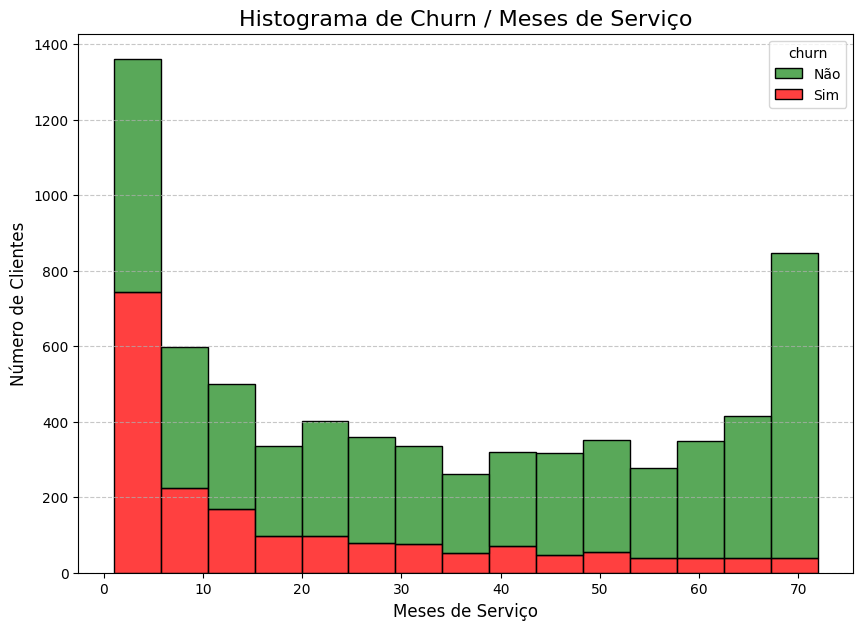

In [69]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.histplot(data=df_analise, x='meses_servico', hue='churn', multiple='stack', palette={'Sim': '#FF0000', 'Não': '#228B22'})

plt.title('Histograma de Churn / Meses de Serviço', fontsize=16)
plt.xlabel('Meses de Serviço', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

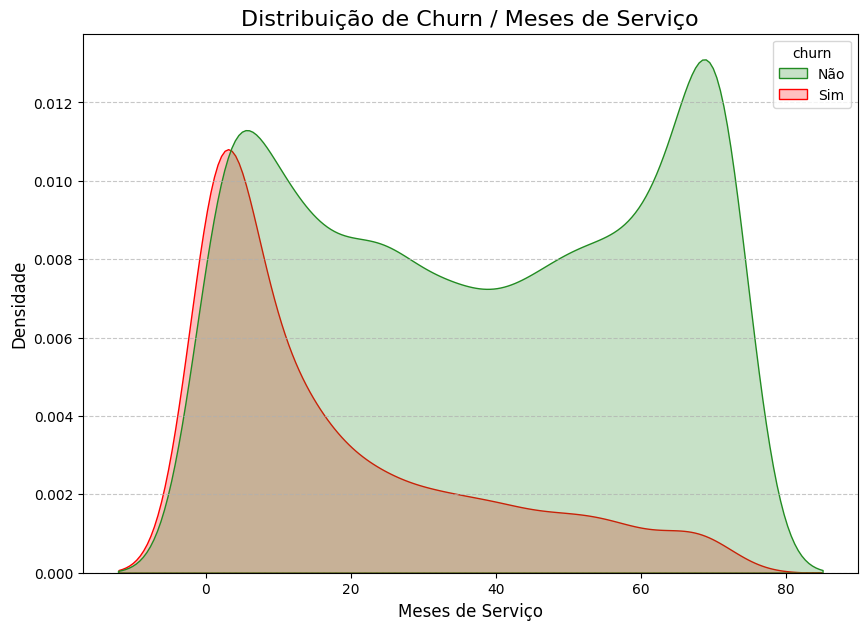

In [70]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.kdeplot(data=df_analise, x='meses_servico', hue='churn', fill=True, palette={'Sim': '#FF0000', 'Não': '#228B22'})

plt.title('Distribuição de Churn / Meses de Serviço', fontsize=16)
plt.xlabel('Meses de Serviço', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
# A linha plt.legend(title='Churn') foi removida para permitir que seaborn gerencie a legenda com base no 'hue'
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

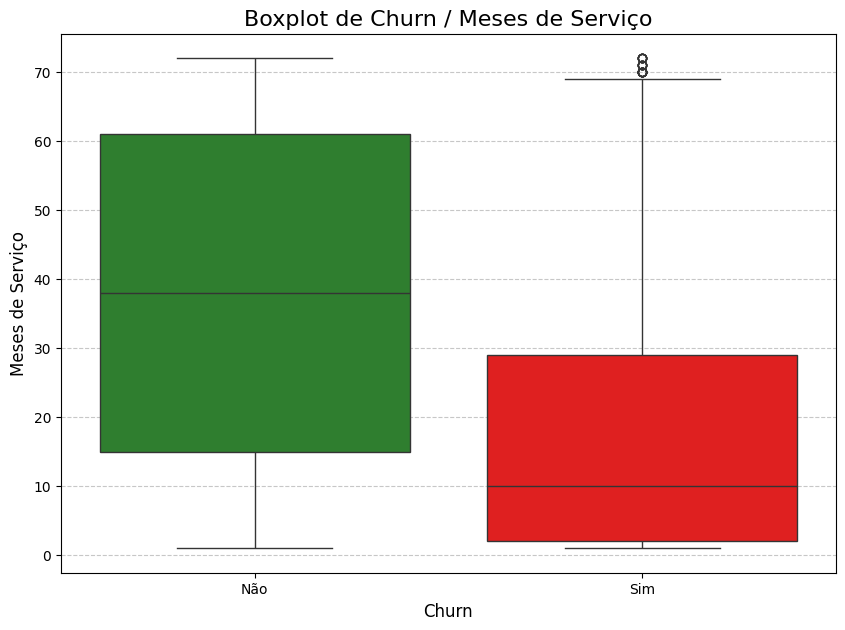

In [71]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.boxplot(data=df_analise, x='churn', y='meses_servico', hue='churn', palette={'Sim': '#FF0000', 'Não': '#228B22'})

plt.title('Boxplot de Churn / Meses de Serviço', fontsize=16)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Meses de Serviço', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 2. Cobrança Mensal

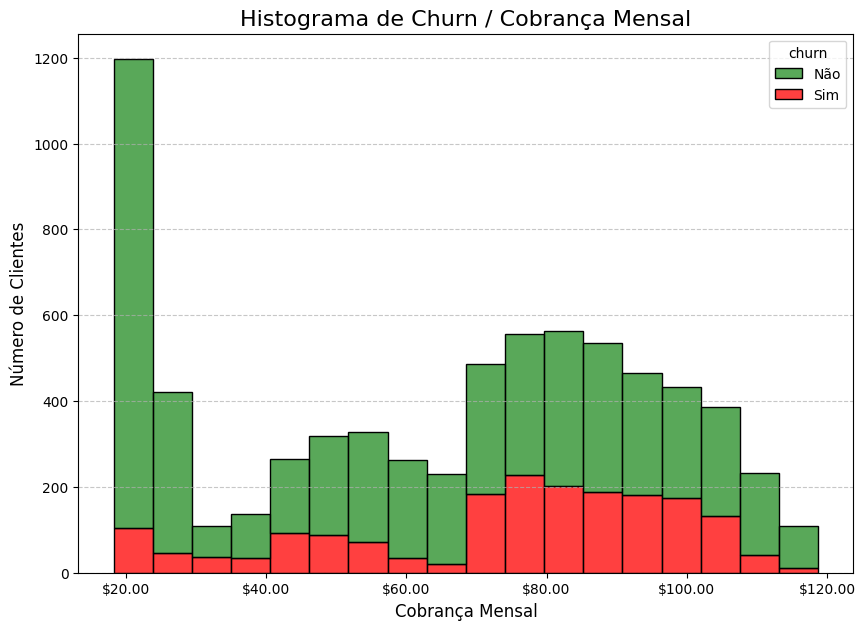

In [72]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

plt.figure(figsize=(10, 7))
sns.histplot(data=df_analise, x='cobranca_mensal', hue='churn', multiple='stack', palette={'Sim': '#FF0000', 'Não': '#228B22'})

plt.title('Histograma de Churn / Cobrança Mensal', fontsize=16)
plt.xlabel('Cobrança Mensal', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Formatar o eixo X para mostrar valores monetários em dólar
plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('$%.2f'))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

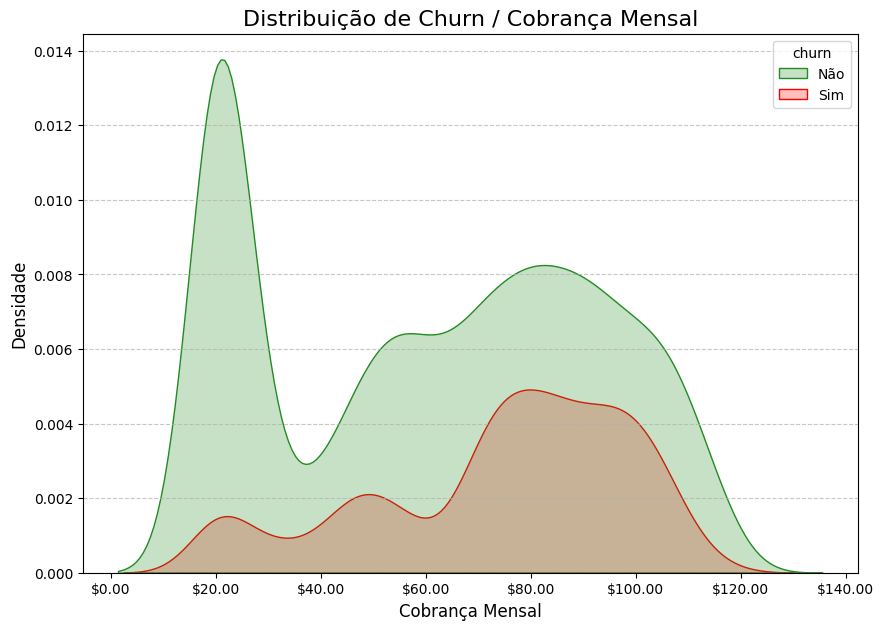

In [73]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick # Importar para formatar o eixo

plt.figure(figsize=(10, 7))
sns.kdeplot(data=df_analise, x='cobranca_mensal', hue='churn', fill=True, palette={'Sim': '#FF0000', 'Não': '#228B22'})

plt.title('Distribuição de Churn / Cobrança Mensal', fontsize=16)
plt.xlabel('Cobrança Mensal', fontsize=12)
plt.ylabel('Densidade', fontsize=12)

# Formatar o eixo X para mostrar valores monetários em dólar
plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('$%.2f'))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

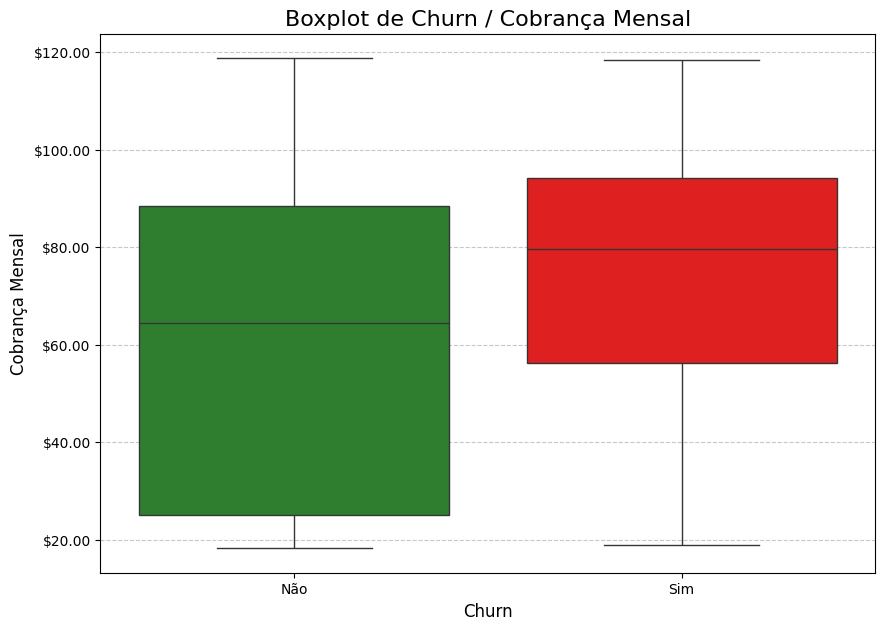

In [74]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

plt.figure(figsize=(10, 7))
sns.boxplot(data=df_analise, x='churn', y='cobranca_mensal', hue='churn', palette={'Sim': '#FF0000', 'Não': '#228B22'})

plt.title('Boxplot de Churn / Cobrança Mensal', fontsize=16)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Cobrança Mensal', fontsize=12)

# Formatar o eixo Y para mostrar valores monetários em dólar
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('$%.2f'))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 3. Cobrança Total

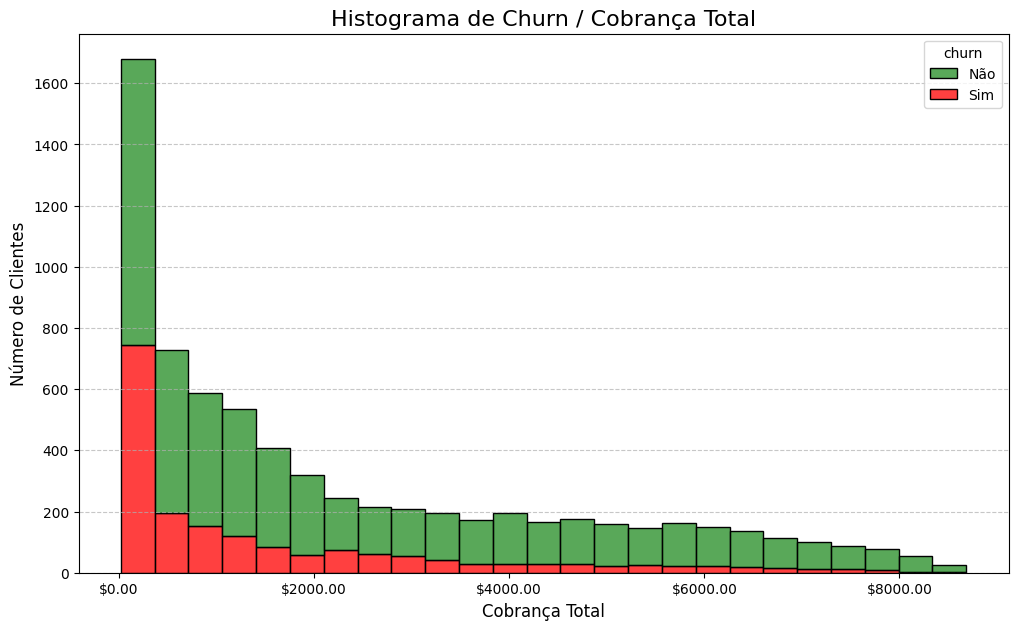

In [75]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

plt.figure(figsize=(12, 7))
sns.histplot(data=df_analise, x='cobranca_total', hue='churn', multiple='stack', palette={'Sim': '#FF0000', 'Não': '#228B22'})

plt.title('Histograma de Churn / Cobrança Total', fontsize=16)
plt.xlabel('Cobrança Total', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Formatar o eixo X para mostrar valores monetários em dólar
plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('$%.2f'))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

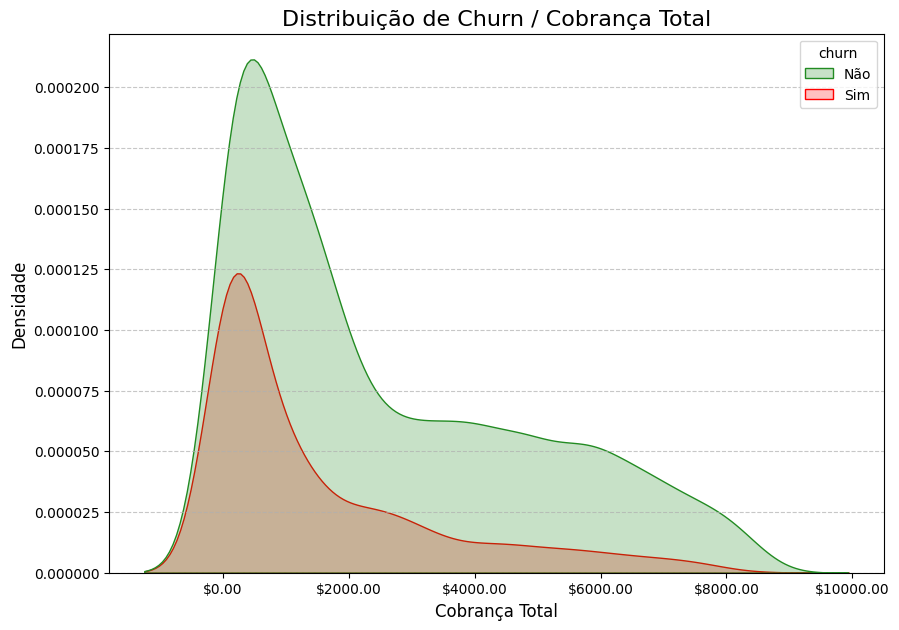

In [76]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick # Importar para formatar o eixo

plt.figure(figsize=(10, 7))
sns.kdeplot(data=df_analise, x='cobranca_total', hue='churn', fill=True, palette={'Sim': '#FF0000', 'Não': '#228B22'})

plt.title('Distribuição de Churn / Cobrança Total', fontsize=16)
plt.xlabel('Cobrança Total', fontsize=12)
plt.ylabel('Densidade', fontsize=12)

# Formatar o eixo X para mostrar valores monetários em dólar
plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('$%.2f'))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

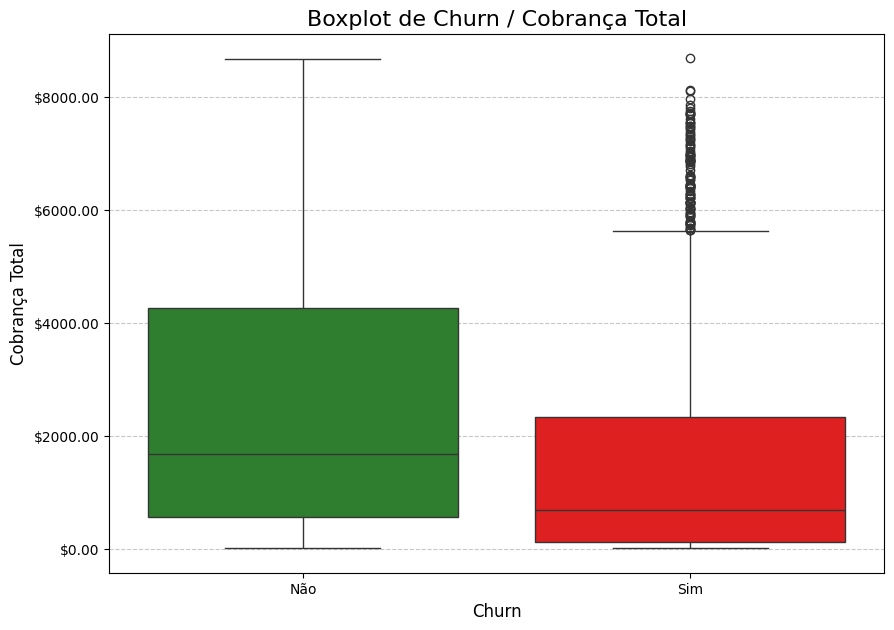

In [77]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

plt.figure(figsize=(10, 7))
sns.boxplot(data=df_analise, x='churn', y='cobranca_total', hue='churn', palette={'Sim': '#FF0000', 'Não': '#228B22'})

plt.title('Boxplot de Churn / Cobrança Total', fontsize=16)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Cobrança Total', fontsize=12)

# Formatar o eixo Y para mostrar valores monetários em dólar
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('$%.2f'))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 📈 Observações Chave da Análise de Churn

Com base na análise exploratória das variáveis categóricas e numéricas, identificamos os seguintes pontos cruciais sobre o comportamento de churn dos clientes da Telecom X.

### Observações sobre Variáveis Categóricas e Churn:

1.  **Churn Geral:** Aproximadamente **27%** dos clientes na base atual cancelaram o serviço, indicando um desafio significativo de retenção.

2.  **Gênero (`genero_cliente`):** O gênero não parece ser um fator significativo para o churn, com taxas de evasão muito similares entre clientes Femininos (27.0%) e Masculinos (26.2%).

3.  **Clientes Seniores (`cliente_senior`):** Clientes idosos têm uma propensão significativamente maior ao churn (**41.7%**) em comparação com clientes não idosos (23.7%). Este é um grupo de alto risco.

4.  **Parceiros e Dependentes:**
    *   Clientes **sem parceiro** (`tem_parceiro`) apresentam uma taxa de churn mais alta (**33.0%**) do que aqueles com parceiro (19.7%).
    *   Clientes **sem dependentes** (`tem_dependentes`) também mostram maior churn (**31.3%**) em comparação com os que têm dependentes (15.5%).
    *   *Insight:* Isso sugere que clientes que moram sozinhos ou não têm família suportada pelo serviço podem ser mais propensos a cancelar.

5.  **Fatura Digital (`fatura_digital`):** Clientes que recebem fatura digital tendem a ter uma taxa de churn maior (**33.6%**) do que aqueles que recebem fatura por correio (16.4%). Isso pode indicar uma preferência ou satisfação menor com o processo digital.

6.  **Tipo de Contrato (`contrato_original`):**
    *   O tipo de contrato é um dos preditores mais fortes de churn. Clientes com contratos **mensais** (`Month-to-month`) têm uma taxa de churn alarmantemente alta de **42.7%**.
    *   Em contraste, clientes com contrato de **um ano** (`One year`) têm 11.3% de churn, e os com contrato de **dois anos** (`Two year`) têm apenas 2.8% de churn. *Insight:* Contratos de longo prazo são cruciais para a retenção.

7.  **Método de Pagamento (`metodo_pagamento`):** Clientes que utilizam **cheque eletrônico** (`Electronic check`) como método de pagamento apresentam a maior taxa de churn (**45.3%**), em comparação com outros métodos como cartão de crédito (15.3%) ou transferência bancária (16.7%).

8.  **Serviço de Internet (`tipo_internet`):**
    *   Clientes com **fibra óptica** (`Fiber optic`) têm uma taxa de churn muito maior (**41.9%**) do que clientes com DSL (19.0%) ou sem serviço de internet (7.4%). *Insight:* Isso pode sugerir problemas de qualidade, expectativas não atendidas ou alta concorrência no serviço de fibra.

9.  **Serviços Adicionais de Internet (Segurança Online, Backup, Proteção de Dispositivo, Suporte Técnico, Streaming TV/Filmes):** Para todos esses serviços, clientes que **não têm o serviço** (mas têm internet) apresentam taxas de churn mais altas do que aqueles que os possuem. Por exemplo:
    *   **Segurança Online:** 'Não' (41.8%) vs 'Sim' (14.6%).
    *   **Suporte Técnico:** 'Não' (41.6%) vs 'Sim' (15.2%).
    *   *Insight:* Isso indica que a agregação de mais serviços adicionais, especialmente os de segurança e suporte, tende a reter os clientes.

### Observações sobre Variáveis Numéricas e Churn:

1.  **Meses de Serviço (`meses_servico`):**
    *   **Churn Precoce:** Os gráficos (KDE, Histograma e Boxplot) mostram claramente que o churn é predominantemente alto nos **primeiros meses de serviço** (especialmente nos primeiros 1 a 5-10 meses).
    *   *Insight:* A mediana de meses de serviço para clientes que cancelam é significativamente menor do que para aqueles que permanecem, reforçando a ideia de que a empresa tem um problema com a retenção inicial de clientes.

2.  **Cobrança Mensal (`cobranca_mensal`):**
    *   Os clientes com churn tendem a ter uma **distribuição de cobrança mensal diferente** dos clientes que permanecem. Há um pico de churners em torno de **$80-$100**, especialmente para clientes de fibra óptica. *Insight:* Isso pode indicar que clientes pagando valores intermediários/altos esperam mais e cancelam se não estiverem satisfeitos.
    *   Clientes com mensalidades muito baixas (que geralmente não têm internet) têm uma taxa de churn baixa.

3.  **Cobrança Total (`cobranca_total`):**
    *   Clientes que cancelam têm uma **cobrança total média muito menor** do que os que permanecem. Isso é esperado, pois eles ficaram menos tempo e/ou pagavam menos.
    *   *Insight:* Os gráficos mostram que a densidade de churners é maior para valores de `cobranca_total` mais baixos, enquanto a densidade de não-churners se estende por valores muito mais altos, confirmando a ligação entre longevidade e valor total pago.

Essas observações fornecem um panorama robusto dos fatores associados ao churn e podem servir como base para a equipe de Data Science desenvolver modelos preditivos e estratégias de retenção mais eficazes.

#📄Relatorio Final